# General Approach 

The general approach of this notebook is :

1. Preprocessing and recogonizing embeded features of dataset.

Explaining the approach :

First of all the models are trained base on whole dataset and features and the `Silhouett Score` is considered as base line, So by removinf every eature the model is trained again and Silhouette score is calculated again and the difference between base line and calculated score is the factor for ranking features.The greater the difference, the less the effect of that feature.

2. Ranking feature base on Unsupervized algorithms

    a. `K-Mean`

    b. `class seprated approach with K-Mean`

    c. `Chameleon` 

    d.  `DBSCAN`

    e. `Agglomarative Clustering`

3. Ranking feature base on Supervized algorithms

    a. `Random Forest` 

    b. `Gradient Boosting`

### PreProcessing

In [2]:
import pandas as pd
from IPython.display import display
import numpy as np

df = pd.read_csv("/home/asma-rashidian/Documents/DrRahmani_projects/project4-DM-11-Bahman-1402/datas/raw/_DM_PRJ_04/Dataset.csv")
df

,FEATURE1,FEATURE2,FEATURE3,FEATURE4,FEATURE5,FEATURE6,FEATURE7,FEATURE8,FEATURE9,FEATURE10,...,FEATURE73,FEATURE74,FEATURE75,FEATURE76,FEATURE77,FEATURE78,FEATURE79,FEATURE80,FEATURE81,ClassLabel
0,718,0,2,2,2,1,17,0,12,3,...,62,118,9,0,77,1,7.121212,1.909091,25,0
1,218,0,2,2,2,1,15,0,7,6,...,41,41,1,1,23,0,4.545455,1.090909,2,0
2,4,0,1,1,1,1,3,0,3,0,...,0,2,0,0,1,0,2.000000,1.000000,2,0
3,5,0,2,2,2,1,4,0,4,0,...,245,279,0,0,0,0,0.000000,0.000000,0,0
4,19,0,1,1,1,1,9,0,4,5,...,2,2,0,0,1,1,1.000000,1.000000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298169,100,0,1,1,1,1,8,0,4,3,...,13,14,0,0,10,1,1.444444,1.000000,2,0
298170,16,0,2,2,2,1,15,3,12,0,...,3,3,0,0,2,0,6.000000,1.000000,3,0
298171,111,1,1,1,1,1,6,0,4,1,...,29,25,0,0,13,2,1.692308,1.000000,1,0
298172,98,0,1,1,1,1,4,0,3,0,...,39,29,0,0,15,1,1.866667,1.000000,5,0


In [5]:
def descriptor(df):
    print(" Basic information from dataset:")
    print("-" * 100)
    print("\n Dimensions of the dataset:")
    print(df.shape)
    print("-" * 100)
    print("\n Info of the data:")
    print(df.info())
    print("-" * 100)
    print("\n Checking the datatypes of the columns")
    print(df.dtypes)
    print("-" * 100)
    print("\n Statistical information:")
    display(df.describe())
    print("-" * 100)

descriptor(df)


 Basic information from dataset:
----------------------------------------------------------------------------------------------------

 Dimensions of the dataset:
(298174, 82)
----------------------------------------------------------------------------------------------------

 Info of the data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298174 entries, 0 to 298173
Data columns (total 82 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   FEATURE1    298174 non-null  int64  
 1   FEATURE2    298174 non-null  int64  
 2   FEATURE3    298174 non-null  int64  
 3   FEATURE4    298174 non-null  int64  
 4   FEATURE5    298174 non-null  int64  
 5   FEATURE6    298174 non-null  int64  
 6   FEATURE7    298174 non-null  int64  
 7   FEATURE8    298174 non-null  int64  
 8   FEATURE9    298174 non-null  int64  
 9   FEATURE10   298174 non-null  int64  
 10  FEATURE11   298174 non-null  int64  
 11  FEATURE12   298174 non-null  int64  
 12 

,FEATURE1,FEATURE2,FEATURE3,FEATURE4,FEATURE5,FEATURE6,FEATURE7,FEATURE8,FEATURE9,FEATURE10,...,FEATURE73,FEATURE74,FEATURE75,FEATURE76,FEATURE77,FEATURE78,FEATURE79,FEATURE80,FEATURE81,ClassLabel
count,298174.000000,298174.000000,298174.000000,298174.000000,298174.000000,298174.000000,298174.000000,298174.000000,298174.000000,298174.000000,...,298174.000000,298174.000000,298174.000000,298174.000000,2.981740e+05,298174.000000,298174.000000,298174.000000,298174.000000,298174.000000
mean,132.433569,0.707882,1.916324,1.848867,2.074329,1.196798,12.018157,0.506100,9.212876,2.066874,...,35.559026,32.703549,2.406712,0.307082,1.609005e+06,0.848109,5.852325,2.031883,5.269175,0.003320
std,309.759500,9.664803,2.453245,1.806889,2.764777,0.892906,13.194637,1.534185,10.296934,3.877207,...,125.777263,81.198569,4.796139,1.036887,4.731976e+07,0.965578,8.138795,1.900823,7.460709,0.057526
min,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,1.000000,1.000000,1.000000,1.000000,4.000000,0.000000,4.000000,0.000000,...,3.000000,5.000000,0.000000,0.000000,2.000000e+00,0.000000,1.750000,1.000000,1.000000,0.000000
50%,53.000000,0.000000,1.000000,1.000000,1.000000,1.000000,8.000000,0.000000,6.000000,0.000000,...,10.000000,12.000000,1.000000,0.000000,6.000000e+00,1.000000,3.333333,1.333333,3.000000,0.000000
75%,133.000000,0.000000,2.000000,2.000000,2.000000,1.000000,15.000000,0.000000,11.000000,3.000000,...,29.000000,31.000000,3.000000,0.000000,2.000000e+01,1.000000,7.000000,2.333333,7.000000,0.000000
max,31652.000000,1001.000000,313.000000,61.000000,313.000000,59.000000,494.000000,55.000000,488.000000,315.000000,...,7844.000000,5503.000000,140.000000,82.000000,5.000111e+09,37.000000,483.750000,60.000000,245.000000,1.000000


----------------------------------------------------------------------------------------------------


In [6]:
import matplotlib.pyplot as plt 
import seaborn as sns 

def box_hist_distribution_plot(df):
    for column in (df.columns[76::]):
        fig, axes = plt.subplots(1, 2, figsize=(15,5))
        sns.boxplot(df[column], ax=axes[0])
        sns.histplot(df[column], kde=True, ax=axes[1])
        plt.xlabel(column)

        plt.savefig("/home/asma-rashidian/Documents/DrRahmani_projects/project4-DM-11-Bahman-1402/results/box_whisker_plot/%s.png" %column)

# box_hist_distribution_plot(df)

In [7]:
from scipy.stats import zscore
df.iloc[:,:-1] = zscore(df.iloc[:,:-1] , axis=0)
display(df)

/tmp/ipykernel_5409/2673801027.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0         1.890394
1         0.276236
2        -0.414624
3        -0.411396
4        -0.366199
            ...   
298169   -0.104706
298170   -0.375884
298171   -0.069194
298172   -0.111162
298173   -0.356515
Name: FEATURE1, Length: 298174, dtype: float64' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iloc[:,:-1] = zscore(df.iloc[:,:-1] , axis=0)
/tmp/ipykernel_5409/2673801027.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0        -0.073243
1        -0.073243
2        -0.073243
3        -0.073243
4        -0.073243
            ...   
298169   -0.073243
298170   -0.073243
298171    0.030225
298172   -0.073243
298173   -0.073243
Name: FEATURE2, Length: 298174, dtype: float64' has dtype incompatible with int64, ple

,FEATURE1,FEATURE2,FEATURE3,FEATURE4,FEATURE5,FEATURE6,FEATURE7,FEATURE8,FEATURE9,FEATURE10,...,FEATURE73,FEATURE74,FEATURE75,FEATURE76,FEATURE77,FEATURE78,FEATURE79,FEATURE80,FEATURE81,ClassLabel
0,1.890394,-0.073243,0.034108,0.083643,-0.026884,-0.220402,0.377566,-0.329883,0.270676,0.240670,...,0.210221,1.050469,1.374710,-0.296158,-0.034001,0.157306,0.155906,-0.064600,2.644636,0
1,0.276236,-0.073243,0.034108,0.083643,-0.026884,-0.220402,0.225989,-0.329883,-0.214907,1.014424,...,0.043259,0.102175,-0.293301,0.668268,-0.034002,-0.878345,-0.160573,-0.495036,-0.438186,0
2,-0.414624,-0.073243,-0.373516,-0.469795,-0.388578,-0.220402,-0.683473,-0.329883,-0.603372,-0.533084,...,-0.282715,-0.378130,-0.501803,-0.296158,-0.034003,-0.878345,-0.473329,-0.542862,-0.438186,0
3,-0.411396,-0.073243,0.034108,0.083643,-0.026884,-0.220402,-0.607684,-0.329883,-0.506256,-0.533084,...,1.665176,3.033266,-0.501803,-0.296158,-0.034003,-0.878345,-0.719066,-1.068951,-0.706258,0
4,-0.366199,-0.073243,-0.373516,-0.469795,-0.388578,-0.220402,-0.228742,-0.329883,-0.506256,0.756506,...,-0.266814,-0.378130,-0.501803,-0.296158,-0.034003,0.157306,-0.596198,-0.542862,-0.572222,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298169,-0.104706,-0.073243,-0.373516,-0.469795,-0.388578,-0.220402,-0.304530,-0.329883,-0.506256,0.240670,...,-0.179357,-0.230344,-0.501803,-0.296158,-0.034003,0.157306,-0.541590,-0.542862,-0.438186,0
298170,-0.375884,-0.073243,0.034108,0.083643,-0.026884,-0.220402,0.225989,1.625557,0.270676,-0.533084,...,-0.258863,-0.365814,-0.501803,-0.296158,-0.034003,-0.878345,0.018145,-0.542862,-0.304151,0
298171,-0.069194,0.030225,-0.373516,-0.469795,-0.388578,-0.220402,-0.456107,-0.329883,-0.506256,-0.275166,...,-0.052148,-0.094873,-0.501803,-0.296158,-0.034003,1.192957,-0.511135,-0.542862,-0.572222,0
298172,-0.111162,-0.073243,-0.373516,-0.469795,-0.388578,-0.220402,-0.607684,-0.329883,-0.603372,-0.533084,...,0.027358,-0.045611,-0.501803,-0.296158,-0.034003,0.157306,-0.489712,-0.542862,-0.036079,0


In [8]:
def drop_constant_features(df):
        
        from sklearn.feature_selection import VarianceThreshold #constant feature
        """
        Using VarianceThreshold from Scikit-learn
            The VarianceThreshold from sklearn provides a simple baseline approach to feature selection.
            It removes all features which variance doesn’t meet a certain threshold.
            By default, it removes all zero-variance features, i.e., features that have the same valuein all samples.

        """
        index_values = df.index.values

        # print("First 5 rows dataset")
        # print(df.head())
        # print("-" * 100)

        print("-" * 100)
        print("\nDimensions of the dataset:")
        print(df.shape)
        print("-" * 100)
        columns = df.index
        # Create a VarianceThreshold object with the desired threshold
        threshold = 0
        selector = VarianceThreshold(threshold)

        # Fit the selector to our data
        selector.fit(df)
        none_constant_indecies =  selector.get_support(indices=True)

        # Filtter the original data to keep only non_constant featues 
        filttered_df = selector.transform(df)
        column_names = df.columns[none_constant_indecies]
        df = pd.DataFrame(filttered_df, columns=column_names)
        df.set_index(index_values, inplace=True)
        return df 

df = drop_constant_features(df)
df

----------------------------------------------------------------------------------------------------

Dimensions of the dataset:
(298174, 82)
----------------------------------------------------------------------------------------------------


,FEATURE1,FEATURE2,FEATURE3,FEATURE4,FEATURE5,FEATURE6,FEATURE7,FEATURE8,FEATURE9,FEATURE10,...,FEATURE73,FEATURE74,FEATURE75,FEATURE76,FEATURE77,FEATURE78,FEATURE79,FEATURE80,FEATURE81,ClassLabel
0,1.890394,-0.073243,0.034108,0.083643,-0.026884,-0.220402,0.377566,-0.329883,0.270676,0.240670,...,0.210221,1.050469,1.374710,-0.296158,-0.034001,0.157306,0.155906,-0.064600,2.644636,0.0
1,0.276236,-0.073243,0.034108,0.083643,-0.026884,-0.220402,0.225989,-0.329883,-0.214907,1.014424,...,0.043259,0.102175,-0.293301,0.668268,-0.034002,-0.878345,-0.160573,-0.495036,-0.438186,0.0
2,-0.414624,-0.073243,-0.373516,-0.469795,-0.388578,-0.220402,-0.683473,-0.329883,-0.603372,-0.533084,...,-0.282715,-0.378130,-0.501803,-0.296158,-0.034003,-0.878345,-0.473329,-0.542862,-0.438186,0.0
3,-0.411396,-0.073243,0.034108,0.083643,-0.026884,-0.220402,-0.607684,-0.329883,-0.506256,-0.533084,...,1.665176,3.033266,-0.501803,-0.296158,-0.034003,-0.878345,-0.719066,-1.068951,-0.706258,0.0
4,-0.366199,-0.073243,-0.373516,-0.469795,-0.388578,-0.220402,-0.228742,-0.329883,-0.506256,0.756506,...,-0.266814,-0.378130,-0.501803,-0.296158,-0.034003,0.157306,-0.596198,-0.542862,-0.572222,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298169,-0.104706,-0.073243,-0.373516,-0.469795,-0.388578,-0.220402,-0.304530,-0.329883,-0.506256,0.240670,...,-0.179357,-0.230344,-0.501803,-0.296158,-0.034003,0.157306,-0.541590,-0.542862,-0.438186,0.0
298170,-0.375884,-0.073243,0.034108,0.083643,-0.026884,-0.220402,0.225989,1.625557,0.270676,-0.533084,...,-0.258863,-0.365814,-0.501803,-0.296158,-0.034003,-0.878345,0.018145,-0.542862,-0.304151,0.0
298171,-0.069194,0.030225,-0.373516,-0.469795,-0.388578,-0.220402,-0.456107,-0.329883,-0.506256,-0.275166,...,-0.052148,-0.094873,-0.501803,-0.296158,-0.034003,1.192957,-0.511135,-0.542862,-0.572222,0.0
298172,-0.111162,-0.073243,-0.373516,-0.469795,-0.388578,-0.220402,-0.607684,-0.329883,-0.603372,-0.533084,...,0.027358,-0.045611,-0.501803,-0.296158,-0.034003,0.157306,-0.489712,-0.542862,-0.036079,0.0


In [9]:

def drop_duplicate_features(df):

    # create an empty dictionary, where we will store 
    # the groups of duplicates
    duplicated_feat_pairs = {}

    # create an empty list to collect features
    # that were found to be duplicated
    _duplicated_feat = []

    # iterate over every feature in our dataset:
    for i in range(0, len(df.columns)):
        
        # choose 1 feature:
        feat_1 = df.columns[i]
        
        # check if this feature has already been identified
        # as a duplicate of another one. If it was, it should be stored in
        # our _duplicated_feat list.
        
        # If this feature was already identified as a duplicate, we skip it, if
        # it has not yet been identified as a duplicate, then we proceed:
        if feat_1 not in _duplicated_feat:
        
            # create an empty list as an entry for this feature in the dictionary:
            duplicated_feat_pairs[feat_1] = []

            # now, iterate over the remaining features of the dataset:
            for feat_2 in df.columns[i + 1:]:

                # check if this second feature is identical to the first one
                if df[feat_1].equals(df[feat_2]):

                    # if it is identical, append it to the list in the dictionary
                    duplicated_feat_pairs[feat_1].append(feat_2)
                    
                    # and append it to our monitor list for duplicated variables
                    _duplicated_feat.append(feat_2)
                    
                    # done!
    df = df[duplicated_feat_pairs.keys()]
    return df 

df = drop_duplicate_features(df)
df

,FEATURE1,FEATURE2,FEATURE3,FEATURE4,FEATURE5,FEATURE6,FEATURE7,FEATURE8,FEATURE9,FEATURE10,...,FEATURE73,FEATURE74,FEATURE75,FEATURE76,FEATURE77,FEATURE78,FEATURE79,FEATURE80,FEATURE81,ClassLabel
0,1.890394,-0.073243,0.034108,0.083643,-0.026884,-0.220402,0.377566,-0.329883,0.270676,0.240670,...,0.210221,1.050469,1.374710,-0.296158,-0.034001,0.157306,0.155906,-0.064600,2.644636,0.0
1,0.276236,-0.073243,0.034108,0.083643,-0.026884,-0.220402,0.225989,-0.329883,-0.214907,1.014424,...,0.043259,0.102175,-0.293301,0.668268,-0.034002,-0.878345,-0.160573,-0.495036,-0.438186,0.0
2,-0.414624,-0.073243,-0.373516,-0.469795,-0.388578,-0.220402,-0.683473,-0.329883,-0.603372,-0.533084,...,-0.282715,-0.378130,-0.501803,-0.296158,-0.034003,-0.878345,-0.473329,-0.542862,-0.438186,0.0
3,-0.411396,-0.073243,0.034108,0.083643,-0.026884,-0.220402,-0.607684,-0.329883,-0.506256,-0.533084,...,1.665176,3.033266,-0.501803,-0.296158,-0.034003,-0.878345,-0.719066,-1.068951,-0.706258,0.0
4,-0.366199,-0.073243,-0.373516,-0.469795,-0.388578,-0.220402,-0.228742,-0.329883,-0.506256,0.756506,...,-0.266814,-0.378130,-0.501803,-0.296158,-0.034003,0.157306,-0.596198,-0.542862,-0.572222,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298169,-0.104706,-0.073243,-0.373516,-0.469795,-0.388578,-0.220402,-0.304530,-0.329883,-0.506256,0.240670,...,-0.179357,-0.230344,-0.501803,-0.296158,-0.034003,0.157306,-0.541590,-0.542862,-0.438186,0.0
298170,-0.375884,-0.073243,0.034108,0.083643,-0.026884,-0.220402,0.225989,1.625557,0.270676,-0.533084,...,-0.258863,-0.365814,-0.501803,-0.296158,-0.034003,-0.878345,0.018145,-0.542862,-0.304151,0.0
298171,-0.069194,0.030225,-0.373516,-0.469795,-0.388578,-0.220402,-0.456107,-0.329883,-0.506256,-0.275166,...,-0.052148,-0.094873,-0.501803,-0.296158,-0.034003,1.192957,-0.511135,-0.542862,-0.572222,0.0
298172,-0.111162,-0.073243,-0.373516,-0.469795,-0.388578,-0.220402,-0.607684,-0.329883,-0.603372,-0.533084,...,0.027358,-0.045611,-0.501803,-0.296158,-0.034003,0.157306,-0.489712,-0.542862,-0.036079,0.0


----------------------------------------------------------------------------------------------------
     Correlation Matrix:


,FEATURE1,FEATURE2,FEATURE3,FEATURE4,FEATURE5,FEATURE6,FEATURE7,FEATURE8,FEATURE9,FEATURE10,...,FEATURE73,FEATURE74,FEATURE75,FEATURE76,FEATURE77,FEATURE78,FEATURE79,FEATURE80,FEATURE81,ClassLabel
FEATURE1,1.000000,0.184911,0.228226,0.240016,0.234223,0.144413,0.326412,0.171014,0.276971,0.294280,...,0.639951,0.700037,0.616254,0.226677,0.313537,0.189082,0.267178,0.195622,0.542660,0.579458
FEATURE2,0.184911,1.000000,0.032185,0.030240,0.033091,0.016819,0.024418,0.004680,0.020817,0.027909,...,0.124362,0.085826,0.040259,0.106706,0.065722,0.018268,0.024489,0.002449,0.036067,0.106259
FEATURE3,0.228226,0.032185,1.000000,0.785091,0.968051,0.520634,0.730817,0.422648,0.786833,0.450942,...,0.108858,0.154793,0.265263,0.051218,0.133596,-0.056882,0.790362,0.518498,0.218920,0.096765
FEATURE4,0.240016,0.030240,0.785091,1.000000,0.797964,0.605563,0.775083,0.517651,0.808896,0.300550,...,0.115810,0.182834,0.340836,0.056461,0.163568,-0.081058,0.766844,0.671692,0.271766,0.100527
FEATURE5,0.234223,0.033091,0.968051,0.797964,1.000000,0.542560,0.730585,0.422796,0.784571,0.442770,...,0.114470,0.161124,0.267047,0.053678,0.138527,-0.053820,0.787849,0.519861,0.222593,0.102132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FEATURE78,0.189082,0.018268,-0.056882,-0.081058,-0.053820,-0.043439,-0.016301,-0.047769,-0.060099,0.092353,...,0.135463,0.102701,0.104555,0.083867,0.028072,1.000000,-0.060266,-0.077847,0.112396,0.052914
FEATURE79,0.267178,0.024489,0.790362,0.766844,0.787849,0.473899,0.926687,0.658619,0.969759,0.426701,...,0.095302,0.158083,0.376203,0.064898,0.145363,-0.060266,1.000000,0.770121,0.306306,0.105361
FEATURE80,0.195622,0.002449,0.518498,0.671692,0.519861,0.306370,0.766553,0.614141,0.781747,0.293827,...,0.052510,0.122953,0.467675,0.048669,0.082657,-0.077847,0.770121,1.000000,0.296384,0.063604
FEATURE81,0.542660,0.036067,0.218920,0.271766,0.222593,0.129795,0.311414,0.198416,0.306951,0.142368,...,0.401593,0.489706,0.711892,0.175960,0.114039,0.112396,0.306306,0.296384,1.000000,0.284718


----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
     Highly correlated features that effect Class Label in descending order:
     Length: 81


['ClassLabel',
 'FEATURE32',
 'FEATURE1',
 'FEATURE30',
 'FEATURE29',
 'FEATURE25',
 'FEATURE47',
 'FEATURE63',
 'FEATURE43',
 'FEATURE27',
 'FEATURE41',
 'FEATURE42',
 'FEATURE46',
 'FEATURE31',
 'FEATURE26',
 'FEATURE24',
 'FEATURE44',
 'FEATURE74',
 'FEATURE28',
 'FEATURE73',
 'FEATURE65',
 'FEATURE48',
 'FEATURE18',
 'FEATURE16',
 'FEATURE34',
 'FEATURE21',
 'FEATURE35',
 'FEATURE75',
 'FEATURE77',
 'FEATURE33',
 'FEATURE36',
 'FEATURE12',
 'FEATURE81',
 'FEATURE23',
 'FEATURE17',
 'FEATURE22',
 'FEATURE49',
 'FEATURE69',
 'FEATURE72',
 'FEATURE64',
 'FEATURE38',
 'FEATURE7',
 'FEATURE70',
 'FEATURE9',
 'FEATURE2',
 'FEATURE79',
 'FEATURE14',
 'FEATURE5',
 'FEATURE20',
 'FEATURE4',
 'FEATURE39',
 'FEATURE3',
 'FEATURE15',
 'FEATURE19',
 'FEATURE10',
 'FEATURE11',
 'FEATURE76',
 'FEATURE8',
 'FEATURE6',
 'FEATURE80',
 'FEATURE78',
 'FEATURE57',
 'FEATURE51',
 'FEATURE53',
 'FEATURE52',
 'FEATURE55',
 'FEATURE56',
 'FEATURE60',
 'FEATURE58',
 'FEATURE67',
 'FEATURE54',
 'FEATURE50',


----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
     Highly correlated features in comaprison to all features.
     Length: 62


{'ClassLabel',
 'FEATURE10',
 'FEATURE12',
 'FEATURE15',
 'FEATURE16',
 'FEATURE18',
 'FEATURE21',
 'FEATURE23',
 'FEATURE24',
 'FEATURE25',
 'FEATURE26',
 'FEATURE27',
 'FEATURE28',
 'FEATURE29',
 'FEATURE30',
 'FEATURE31',
 'FEATURE32',
 'FEATURE33',
 'FEATURE34',
 'FEATURE35',
 'FEATURE36',
 'FEATURE37',
 'FEATURE38',
 'FEATURE4',
 'FEATURE41',
 'FEATURE42',
 'FEATURE43',
 'FEATURE44',
 'FEATURE46',
 'FEATURE47',
 'FEATURE48',
 'FEATURE49',
 'FEATURE5',
 'FEATURE53',
 'FEATURE54',
 'FEATURE55',
 'FEATURE56',
 'FEATURE57',
 'FEATURE58',
 'FEATURE59',
 'FEATURE6',
 'FEATURE60',
 'FEATURE61',
 'FEATURE62',
 'FEATURE63',
 'FEATURE64',
 'FEATURE65',
 'FEATURE66',
 'FEATURE67',
 'FEATURE68',
 'FEATURE69',
 'FEATURE7',
 'FEATURE70',
 'FEATURE72',
 'FEATURE73',
 'FEATURE74',
 'FEATURE75',
 'FEATURE79',
 'FEATURE8',
 'FEATURE80',
 'FEATURE81',
 'FEATURE9'}

----------------------------------------------------------------------------------------------------


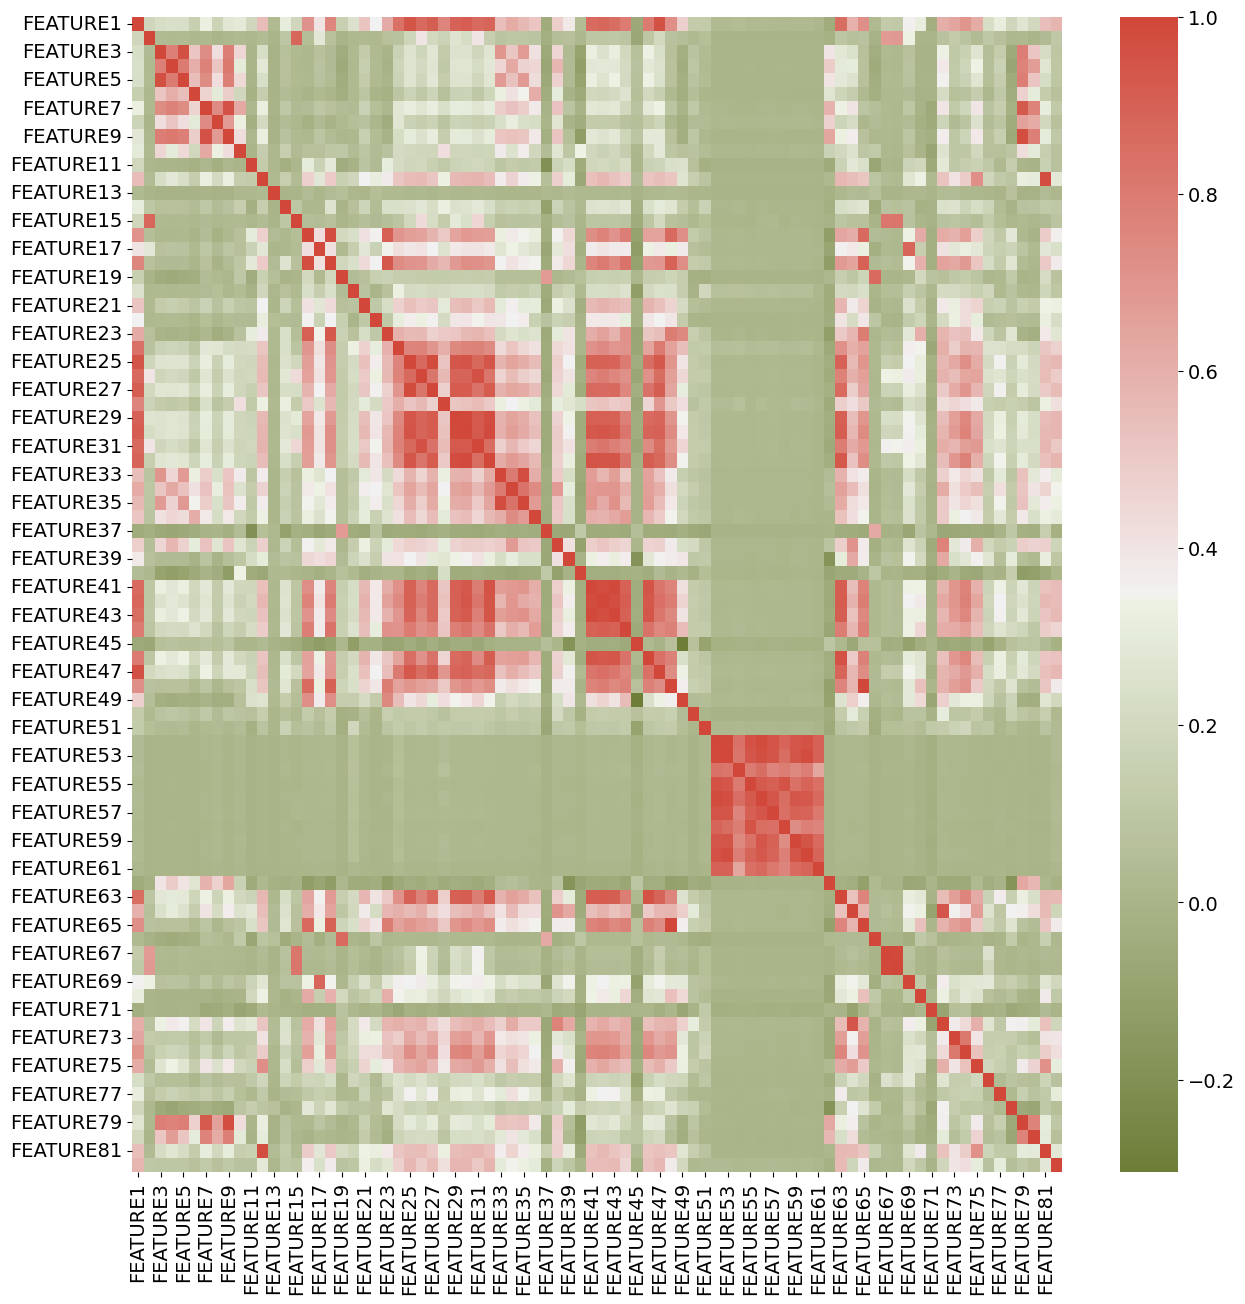

In [11]:

def pearson_correlation(df, threshold=0.5):
    import numpy as np 

    """
        Visualising correlated features:
            A correlation matrix will be made, which check the 
            correlation of all features (that is, for all possible feature combinations)
            and then visualise the correlation matrix using a heatmap
        Note:
            The default correlation method of pandas.corr is pearson
    """

    print("-" * 100)
    print("     Correlation Matrix:")
    correlation_matrix = df.corr(method="pearson")
    display(correlation_matrix)
    print("-" * 100)


    # Heatmap with  seaborn
    correlation_heatmap = sns.diverging_palette(100, 15, as_cmap=True)
    fig , ax = plt.subplots()
    plt.rcParams["font.size"] = 14
    fig.set_size_inches(15,15)
    sns.heatmap(correlation_matrix, cmap=correlation_heatmap)
    plt.savefig("/home/asma-rashidian/Documents/DrRahmani_projects/project4-DM-11-Bahman-1402/results/correlation/correlation.png")

    ####
    top_81_correlated_features = correlation_matrix.nlargest(81, ["ClassLabel"])
    top_81_column_names = top_81_correlated_features.index.to_list()
    print("-" * 100)
    print("     Highly correlated features that effect Class Label in descending order:")
    print("     Length: %d" %len(top_81_column_names))
    display(top_81_column_names)
    print("-" * 100) 
    
    def highly_correlated_features(correlation_matrix):
        correlation_matrix_coppy = correlation_matrix
        highly_correlated_features = set()
        n=len(correlation_matrix_coppy) ** 2
        mask = ~correlation_matrix_coppy.isna()
        # Set the lower triangle of the correlation matrix to NaN
        lower_triangle = np.tril(mask)
        correlation_matrix_coppy.mask(lower_triangle, inplace=True)
        correlations = correlation_matrix_coppy.abs().unstack().sort_values(ascending=False)

        sorted_correlations = correlations.dropna()[:n]

        for attr1, attr2 in sorted_correlations.index:
            if sorted_correlations[attr1, attr2] > threshold:
                highly_correlated_features.add(attr1)
        
        return highly_correlated_features
    
    highly_correlated_feature = highly_correlated_features(correlation_matrix) 
    df = df[list(highly_correlated_feature)]
    print("-" * 100)
    print("     Highly correlated features in comaprison to all features.")
    print("     Length: %d" %len(highly_correlated_feature))
    display(highly_correlated_feature)
    print("-" * 100)


pearson_correlation(df)

## UnSupervised



### K-Means

Run K-means clustering with all features and determine the baseline cluster quality using an appropriate metric, like within-cluster sum of squares (WCSS).

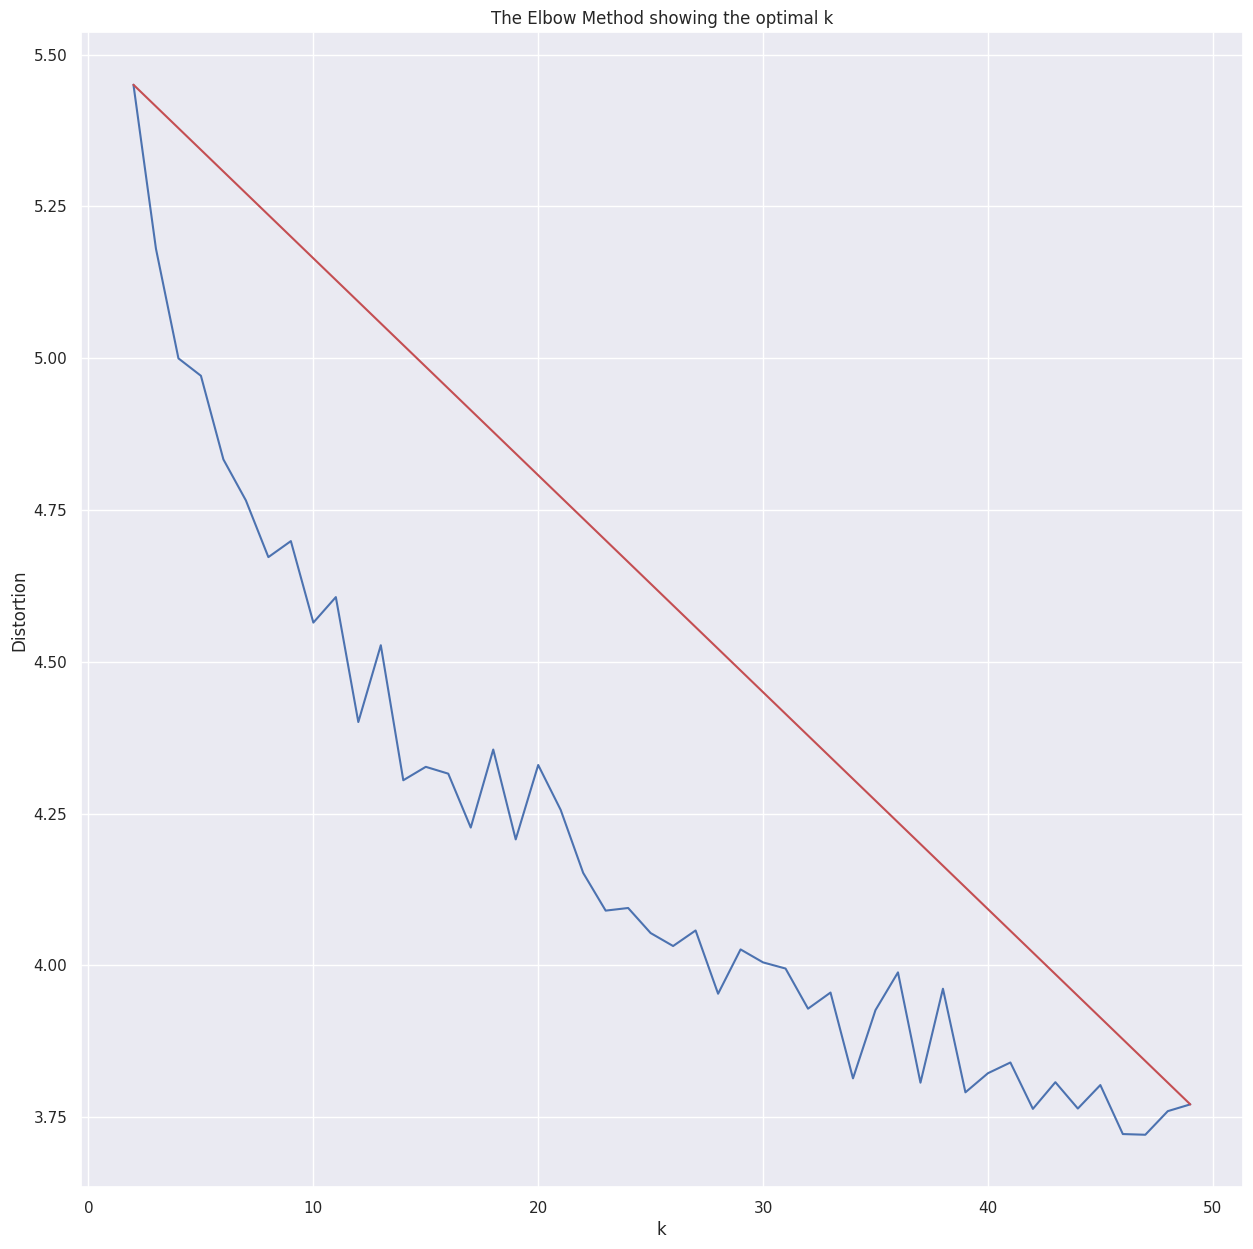

In [51]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist

feature_df = df.iloc[:, :-1]
classLabel = df.iloc[:, -1]

distortions = []
K = range(2, 50)
for k in K:
    k_means = KMeans(n_clusters=k).fit(feature_df)
    k_means.fit(feature_df)
    distortions.append(sum(np.min(cdist(feature_df, k_means.cluster_centers_, 'euclidean'), axis=1)) / feature_df.shape[0])

X_line = [K[0], K[-1]]
Y_line = [distortions[0], distortions[-1]]

# Plot the elbow
plt.plot(K, distortions, 'b-')
plt.plot(X_line, Y_line, 'r')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.savefig("/home/asma-rashidian/Documents/DrRahmani_projects/project4-DM-11-Bahman-1402/results/k-means/kmeans_elbow.png")
plt.show()

[0 1 1 ... 1 1 1]


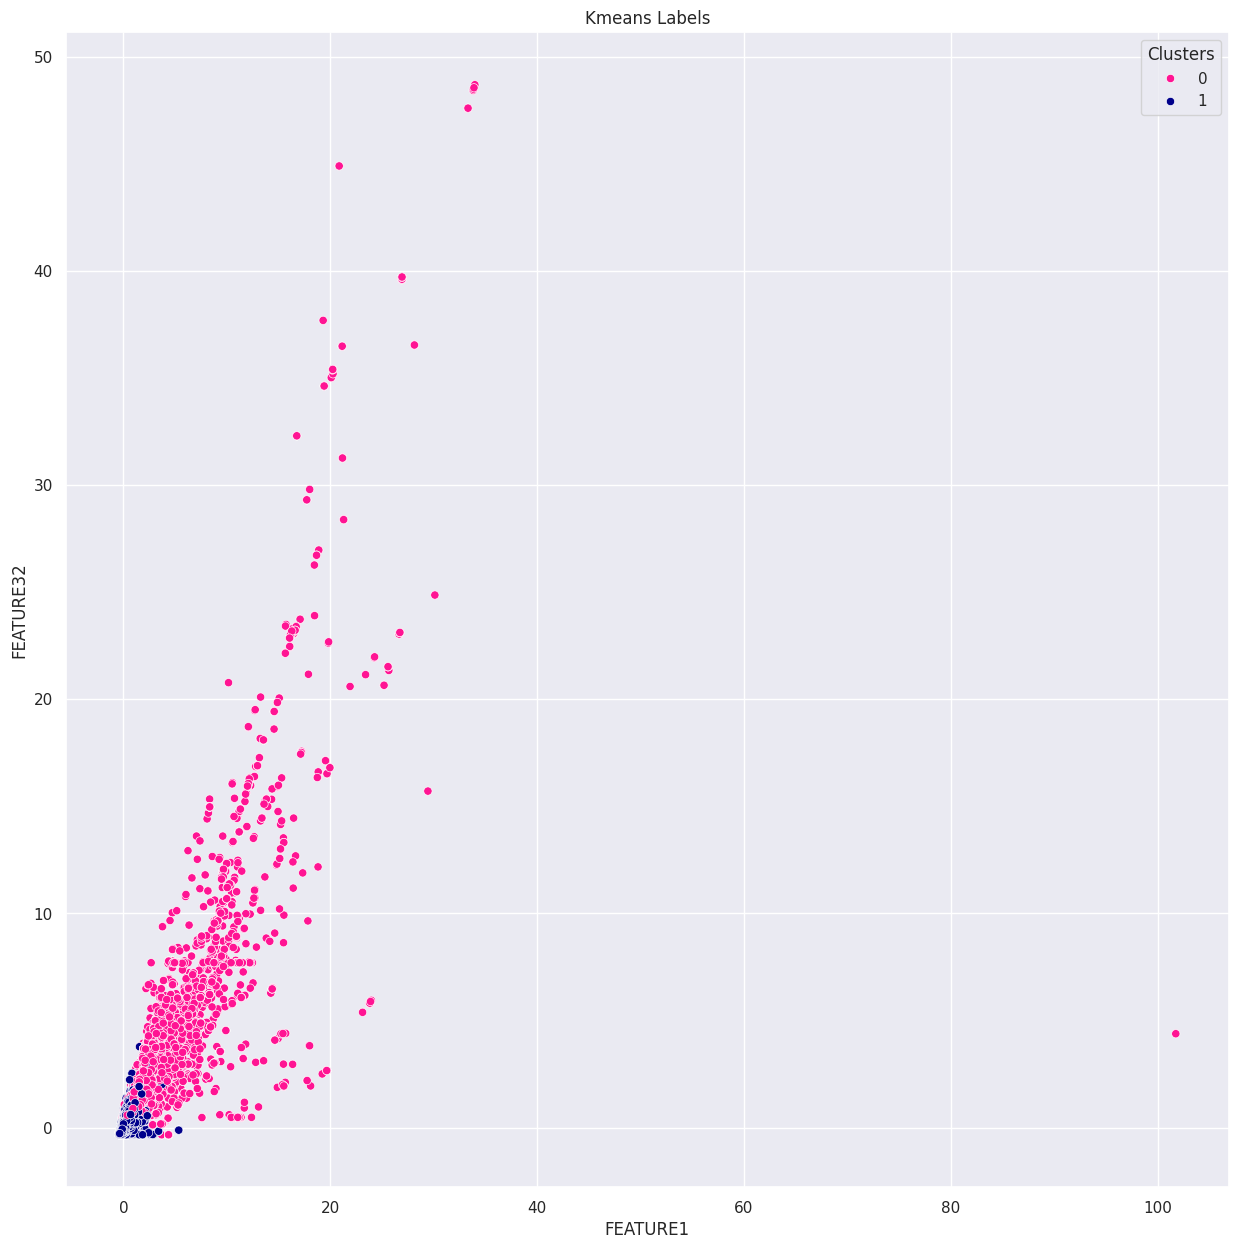

In [29]:
n_clusters = 2
kmeans =  KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit_transform(feature_df)
pred_classLabel = kmeans.labels_
print(pred_classLabel)

# sns settings
sns.set(rc={'figure.figsize':(15, 15)})
custom_palette = ["#FF1493", "#00008B"]  # Pink and Dark Blue colors

sns.scatterplot(x=feature_df.iloc[:, 0], y=feature_df.iloc[:, 31], hue=pred_classLabel, palette=custom_palette)
plt.title('Kmeans Labels')
plt.legend(title='Clusters', loc='upper right')
plt.savefig("/home/asma-rashidian/Documents/DrRahmani_projects/project4-DM-11-Bahman-1402/results/k-means/kmeans_f32_f1.png")
plt.show()

In [30]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

feature_df = df.iloc[:, :-1]
classLabel = df.iloc[:, -1]

n_clusters = 2
kmeans =  KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(feature_df)
pred_classLabel = kmeans.labels_
baseline_score = silhouette_score(feature_df, pred_classLabel)
print(baseline_score)



0.6466007106299214


`Note!!`

Base on runtime of this cell and the approach I have considered it takes more than 22 hours of process so I have undersampled the dataset to make processing easier.

### K-Means with UnderSampling

In [12]:
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler


class_counts = df['ClassLabel'].value_counts()
print(class_counts)

# Let's assume df is your dataframe and 'ClassLabel' is the column with the class labels

# Initialize the RandomUnderSampler object
rus = RandomUnderSampler(sampling_strategy={0: 990}, random_state=42) 

# Perform under sampling
X_resampled, y_resampled = rus.fit_resample(df.drop('ClassLabel', axis=1), df['ClassLabel'])

# Combine the resampled data back into a new dataframe
df_resampled = pd.concat([X_resampled, y_resampled], axis=1)

# df_resampled now contains the under sampled data
df_resampled

ClassLabel
0.0    297184
1.0       990
Name: count, dtype: int64


,FEATURE1,FEATURE2,FEATURE3,FEATURE4,FEATURE5,FEATURE6,FEATURE7,FEATURE8,FEATURE9,FEATURE10,...,FEATURE73,FEATURE74,FEATURE75,FEATURE76,FEATURE77,FEATURE78,FEATURE79,FEATURE80,FEATURE81,ClassLabel
18605,-0.401711,0.030225,-0.373516,-0.469795,-0.388578,-0.220402,-0.835050,-0.329883,-0.797605,-0.533084,...,-0.282715,-0.390445,-0.501803,-0.296158,-0.034003,0.157306,-0.719066,-0.542862,-0.706258,0.0
46049,-0.091793,-0.073243,1.256980,1.743958,1.419889,2.019478,2.348067,3.580996,1.436073,2.819851,...,-0.235011,-0.082558,0.332203,0.668268,-0.034003,-0.878345,1.492567,1.561493,-0.438186,0.0
125695,0.269779,-0.073243,0.441732,0.637081,0.334809,-0.220402,0.529143,-0.329883,0.173559,1.272342,...,-0.012395,-0.008665,-0.293301,0.668268,-0.034002,0.157306,0.171730,-0.411340,1.438314,0.0
21809,-0.256437,-0.073243,0.441732,0.637081,0.334809,-0.220402,1.741759,1.625557,0.950491,2.819851,...,-0.274764,-0.341183,-0.084800,-0.296158,-0.034003,0.157306,0.509619,0.509315,-0.036079,0.0
104386,-0.001400,-0.073243,0.849356,1.190520,0.696503,0.899538,1.438605,1.625557,1.047607,1.272342,...,-0.044197,0.188384,0.123701,-0.296158,-0.034002,0.157306,1.083005,0.158589,0.097957,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296911,13.544616,1.375314,0.849356,0.637081,1.058196,0.899538,0.680720,0.321930,0.853374,-0.275166,...,10.410810,12.651678,14.510297,-0.296158,0.625186,0.157306,1.064135,0.374350,14.037673,1.0
297208,11.065269,28.070161,1.256980,0.637081,1.058196,-0.220402,1.287028,-0.329883,0.756258,2.304015,...,4.972616,-0.082558,-0.501803,-0.296158,-0.034000,-0.878345,0.902798,-0.174600,-0.304151,1.0
297289,21.186041,3.237745,0.849356,0.637081,0.696503,-0.220402,0.529143,-0.329883,0.756258,-0.017248,...,56.150473,54.339675,3.251222,0.668268,-0.033840,0.157306,0.890891,-0.284338,4.655172,1.0
297504,7.052472,0.444099,-0.373516,-0.469795,-0.388578,-0.220402,-0.228742,-0.329883,-0.409140,0.240670,...,-0.131654,-0.193397,-0.293301,1.632695,-0.034003,0.157306,-0.385566,-0.317396,0.097957,1.0


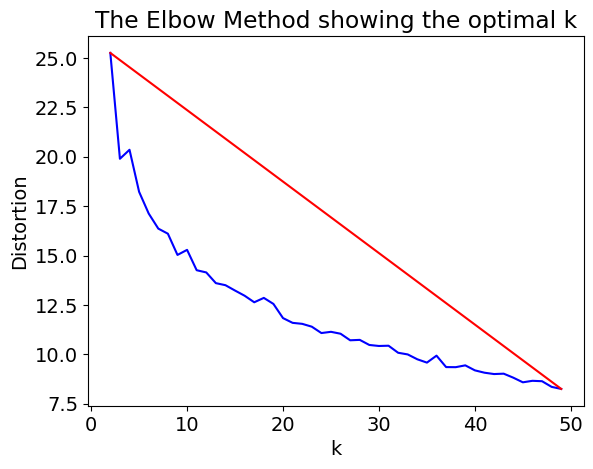

In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist

feature_df_rsampled = df_resampled.iloc[:, :-1]
classLabel_df_rsampled = df_resampled.iloc[:, -1]

distortions = []
K = range(2, 50)
for k in K:
    k_means = KMeans(n_clusters=k).fit(feature_df_rsampled)
    k_means.fit(feature_df_rsampled)
    distortions.append(sum(np.min(cdist(feature_df_rsampled, k_means.cluster_centers_, 'euclidean'), axis=1)) / feature_df_rsampled.shape[0])

X_line = [K[0], K[-1]]
Y_line = [distortions[0], distortions[-1]]

# Plot the elbow
plt.plot(K, distortions, 'b-')
plt.plot(X_line, Y_line, 'r')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.savefig("/home/asma-rashidian/Documents/DrRahmani_projects/project4-DM-11-Bahman-1402/results/k-means/kmeans_elbow_underSample.png")
plt.show()


In [15]:

n_clusters = 2
kmeans =  KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(feature_df_rsampled)
pred_classLabel_rsampled = kmeans.labels_
baseline_score = silhouette_score(feature_df_rsampled, pred_classLabel_rsampled)
print(baseline_score)

0.5636055651247862


In [16]:
# Initialize list to store feature importances
feature_importances = []
# Iterate over all features and assess their importance
for i in range(feature_df_rsampled.shape[1]):
    temp_X = np.delete(feature_df_rsampled, i, axis=1)  # Omit the current feature
    kmeans.fit(temp_X)
    score = silhouette_score(temp_X, kmeans.labels_)
    importance = baseline_score - score  # A decrease in silhouette score
    feature_importances.append((feature_df_rsampled.columns[i], importance))

# Sort features by importance
feature_importances.sort(key=lambda x: x[1], reverse=True)

# Print ranked features
print("Feature ranking based on K-means clustering:")
for rank, (feature, importance) in enumerate(feature_importances, 1):
    display(f"{rank}. {feature}: {importance}")


Feature ranking based on K-means clustering:


'1. FEATURE46: 0.005622769633855107'

'2. FEATURE43: 0.005282583727695633'

'3. FEATURE41: 0.004601954992325408'

'4. FEATURE27: 0.004359217149423'

'5. FEATURE32: 0.004121937329088388'

'6. FEATURE42: 0.0037161049983421846'

'7. FEATURE35: 0.003341297229770057'

'8. FEATURE30: 0.00314409482712541'

'9. FEATURE36: 0.0029641678939091864'

'10. FEATURE29: 0.0028945122087918884'

'11. FEATURE25: 0.0027919868452531693'

'12. FEATURE34: 0.002783914580670177'

'13. FEATURE63: 0.0026239270384228464'

'14. FEATURE44: 0.0022955637428511144'

'15. FEATURE33: 0.0018444718747447908'

'16. FEATURE77: 0.001001998490300915'

'17. FEATURE74: 0.0001767584996488214'

'18. FEATURE5: 0.00017014942137527633'

'19. FEATURE3: 0.00013155412889676033'

'20. FEATURE6: 6.700076658161525e-05'

'21. FEATURE79: -2.9926847167405235e-05'

'22. FEATURE4: -4.260146322809799e-05'

'23. FEATURE9: -9.772072102187668e-05'

'24. FEATURE68: -0.00012411009242330184'

'25. FEATURE67: -0.00020785170856318924'

'26. FEATURE31: -0.0003030697746532196'

'27. FEATURE7: -0.00031011880181353035'

'28. FEATURE73: -0.0003604736271999309'

'29. FEATURE62: -0.00041694695373473145'

'30. FEATURE19: -0.0004284024870483405'

'31. FEATURE80: -0.000431069315412147'

'32. FEATURE58: -0.00045696061216060624'

'33. FEATURE56: -0.00048378576859930966'

'34. FEATURE66: -0.0005296088959076961'

'35. FEATURE8: -0.0005307421145461788'

'36. FEATURE60: -0.0005340673681724084'

'37. FEATURE52: -0.000549155036569271'

'38. FEATURE37: -0.0005587107930508095'

'39. FEATURE50: -0.0005588918283460087'

'40. FEATURE38: -0.0005627912988934725'

'41. FEATURE26: -0.0005654929105441964'

'42. FEATURE45: -0.0006533642074647572'

'43. FEATURE40: -0.0006692045284307779'

'44. FEATURE72: -0.000674558605555653'

'45. FEATURE15: -0.0006768855097045723'

'46. FEATURE71: -0.0006981168544204497'

'47. FEATURE51: -0.000716911290715827'

'48. FEATURE39: -0.0007318037157596491'

'49. FEATURE64: -0.0007825890890820197'

'50. FEATURE10: -0.0007864287903822653'

'51. FEATURE12: -0.0007938221892841435'

'52. FEATURE13: -0.0008409772006878757'

'53. FEATURE1: -0.000937252977525449'

'54. FEATURE81: -0.000947302984381837'

'55. FEATURE47: -0.0009530694245883931'

'56. FEATURE78: -0.0010690193482132404'

'57. FEATURE11: -0.0011004383096108183'

'58. FEATURE75: -0.001135451493270101'

'59. FEATURE48: -0.0011468695050266264'

'60. FEATURE65: -0.0012123497523685023'

'61. FEATURE69: -0.0012208537210272041'

'62. FEATURE76: -0.0012352550822845032'

'63. FEATURE70: -0.0014250328274710844'

'64. FEATURE61: -0.001580283637652835'

'65. FEATURE20: -0.0016697531246353536'

'66. FEATURE59: -0.0016888890535911028'

'67. FEATURE23: -0.0020186597611479007'

'68. FEATURE2: -0.002076513445523842'

'69. FEATURE14: -0.0023236705293046'

'70. FEATURE17: -0.0023627685090904516'

'71. FEATURE18: -0.002365140638811769'

'72. FEATURE49: -0.0023970138346934844'

'73. FEATURE22: -0.002474736073525885'

'74. FEATURE54: -0.002515567934315177'

'75. FEATURE55: -0.0026393282712101618'

'76. FEATURE16: -0.002748395207445964'

'77. FEATURE53: -0.0027983508452334993'

'78. FEATURE57: -0.0029161553222355474'

'79. FEATURE21: -0.003156030193404047'

'80. FEATURE24: -0.005008508067209982'

'81. FEATURE28: -0.008474517044503638'

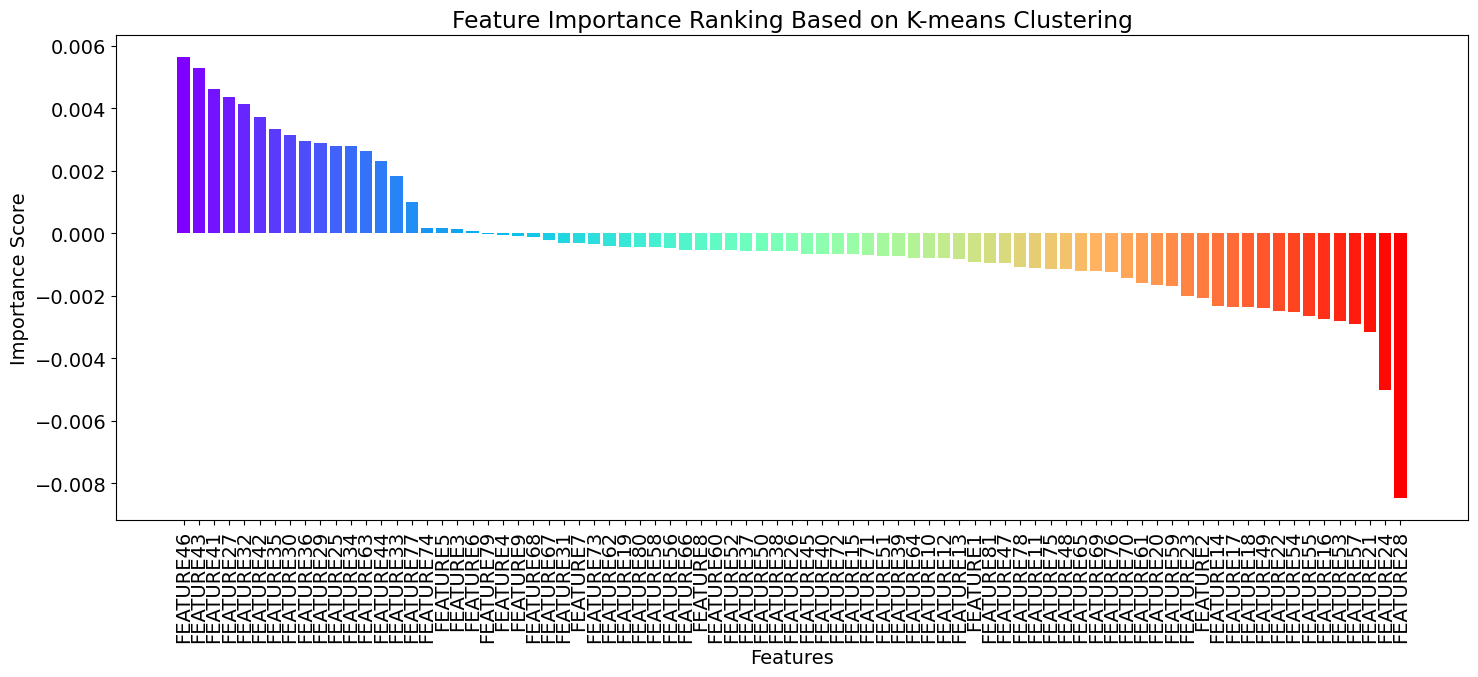

In [17]:
import matplotlib.pyplot as plt

# Assuming 'feature_importances' is a list of tuples with (feature_name, importance) from the previous steps
feature_names, importances = zip(*feature_importances)

plt.figure(figsize=(15, 7))
colors = plt.cm.rainbow(np.linspace(0, 1, len(feature_names)))  # Generate rainbow colors

plt.bar(feature_names, importances, color=colors)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance Ranking Based on K-means Clustering')
plt.xticks(rotation=90)  # Rotate feature names to avoid overlap
plt.tight_layout()  # Adjust layout to fit all feature names
plt.savefig("/home/asma-rashidian/Documents/DrRahmani_projects/project4-DM-11-Bahman-1402/results/k-means/feature_ranks.png")
plt.show()

### Part B: class seprated aproach

In [18]:
df_0_records = df_resampled[df_resampled['ClassLabel'] == 0]
df_1_records = df_resampled[df_resampled['ClassLabel'] == 0]



#### For Class Label 0 :

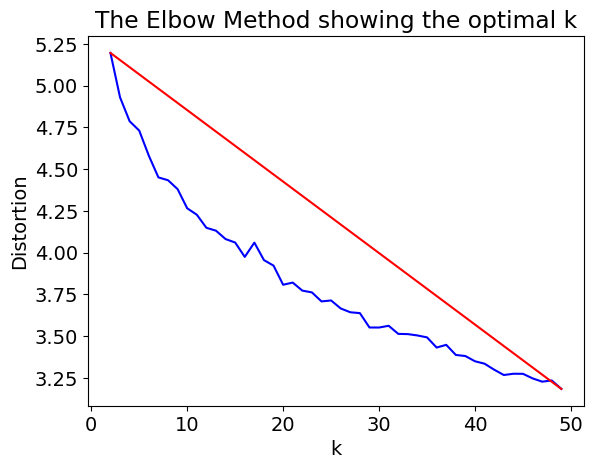

In [19]:
df_0_records_feature = df_0_records.iloc[:, :-1]

distortions = []
K = range(2, 50)
for k in K:
    k_means = KMeans(n_clusters=k).fit(df_0_records_feature)
    k_means.fit(df_0_records_feature)
    distortions.append(sum(np.min(cdist(df_0_records_feature, k_means.cluster_centers_, 'euclidean'), axis=1)) / df_0_records_feature.shape[0])

X_line = [K[0], K[-1]]
Y_line = [distortions[0], distortions[-1]]

# Plot the elbow
plt.plot(K, distortions, 'b-')
plt.plot(X_line, Y_line, 'r')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.savefig("/home/asma-rashidian/Documents/DrRahmani_projects/project4-DM-11-Bahman-1402/results/class_seprated/class_0_elbow.png")
plt.show()

In [20]:

n_clusters = 2
kmeans =  KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(df_0_records_feature)
pred_classLabel_0_rsampled = kmeans.labels_
baseline_score = silhouette_score(df_0_records_feature, pred_classLabel_0_rsampled)
print(baseline_score)

0.4963830190801325


In [21]:
# Initialize list to store feature importances
feature_importances_CB0 = []
# Iterate over all features and assess their importance
for i in range(df_0_records_feature.shape[1]):
    temp_X = np.delete(df_0_records_feature, i, axis=1)  # Omit the current feature
    kmeans.fit(temp_X)
    score = silhouette_score(temp_X, kmeans.labels_)
    importance = baseline_score - score  # A decrease in silhouette score
    feature_importances_CB0.append((df_0_records_feature.columns[i], importance))

# Sort features by importance
feature_importances_CB0.sort(key=lambda x: x[1], reverse=True)

# Print ranked features
print("Feature ranking based on K-means clustering for Class Label 0:")
for rank, (feature, importance) in enumerate(feature_importances_CB0, 1):
    display(f"{rank}. {feature}: {importance}")

Feature ranking based on K-means clustering for Class Label 0:


'1. FEATURE75: 0.009873950503348772'

'2. FEATURE48: 0.008589195747976841'

'3. FEATURE65: 0.008586901144274905'

'4. FEATURE81: 0.0074984552504374635'

'5. FEATURE24: 0.00731102786240545'

'6. FEATURE12: 0.007100893525616991'

'7. FEATURE18: 0.0068725483621470684'

'8. FEATURE26: 0.006157359068949986'

'9. FEATURE31: 0.005858814345333474'

'10. FEATURE47: 0.005712645862366805'

'11. FEATURE16: 0.005655116090235168'

'12. FEATURE30: 0.005591339101202075'

'13. FEATURE32: 0.005513403898285751'

'14. FEATURE29: 0.005496518772497072'

'15. FEATURE1: 0.005360330902349109'

'16. FEATURE69: 0.005308717700533927'

'17. FEATURE63: 0.005003145641184814'

'18. FEATURE14: 0.004945564186940421'

'19. FEATURE25: 0.004855027710161386'

'20. FEATURE46: 0.0048177835736957775'

'21. FEATURE27: 0.0035647677255227217'

'22. FEATURE67: 0.0034486207052610296'

'23. FEATURE7: 0.0034365946078366294'

'24. FEATURE44: 0.0032700366676261527'

'25. FEATURE68: 0.00315024823266824'

'26. FEATURE62: 0.0028127081209639027'

'27. FEATURE42: 0.002687641335709423'

'28. FEATURE74: 0.0026716194829973228'

'29. FEATURE73: 0.0024331578507192364'

'30. FEATURE79: 0.0019132951948915844'

'31. FEATURE2: 0.0018531627068822942'

'32. FEATURE9: 0.0018385619204268622'

'33. FEATURE41: 0.0014484582884344288'

'34. FEATURE43: 0.0013732261087801012'

'35. FEATURE6: 0.0008906783958190778'

'36. FEATURE60: 0.0007873624543742186'

'37. FEATURE59: 0.0007060444459348614'

'38. FEATURE61: 0.0004181625558621338'

'39. FEATURE56: 0.00039861380663153145'

'40. FEATURE53: 0.000306570356715663'

'41. FEATURE15: 0.00026956786758702833'

'42. FEATURE52: 0.00024929900146175576'

'43. FEATURE55: 0.00023342450995816888'

'44. FEATURE57: 0.00019158248243006382'

'45. FEATURE58: 7.797928332536896e-05'

'46. FEATURE20: 1.663383001043739e-05'

'47. FEATURE77: 1.2715968000787115e-08'

'48. FEATURE5: -1.9839397576271178e-05'

'49. FEATURE54: -4.4836625927024976e-05'

'50. FEATURE13: -0.00028034459995818217'

'51. FEATURE22: -0.00028675987665610636'

'52. FEATURE76: -0.00046567648908080184'

'53. FEATURE28: -0.0006810624548106436'

'54. FEATURE11: -0.0016464094548336305'

'55. FEATURE8: -0.0018655955264215707'

'56. FEATURE21: -0.00230888756589126'

'57. FEATURE10: -0.0029680937226542192'

'58. FEATURE4: -0.003614760679580109'

'59. FEATURE51: -0.0036209663324453523'

'60. FEATURE23: -0.003995865849706681'

'61. FEATURE35: -0.004216231667578785'

'62. FEATURE33: -0.00430641683857147'

'63. FEATURE66: -0.004362196595835366'

'64. FEATURE19: -0.004462602780900826'

'65. FEATURE3: -0.00457534232229706'

'66. FEATURE34: -0.00574096885930564'

'67. FEATURE70: -0.006114277532984769'

'68. FEATURE71: -0.006141509766191544'

'69. FEATURE78: -0.006514805614545427'

'70. FEATURE40: -0.006765549828694595'

'71. FEATURE37: -0.007082396337231622'

'72. FEATURE50: -0.007821250458159179'

'73. FEATURE80: -0.007949329037579611'

'74. FEATURE45: -0.008844444199655244'

'75. FEATURE36: -0.009661772251180034'

'76. FEATURE17: -0.013267840887308147'

'77. FEATURE49: -0.015272158149563508'

'78. FEATURE38: -0.019827391660981686'

'79. FEATURE39: -0.021978476976809214'

'80. FEATURE64: -0.02852577211548124'

'81. FEATURE72: -0.03557919879256721'

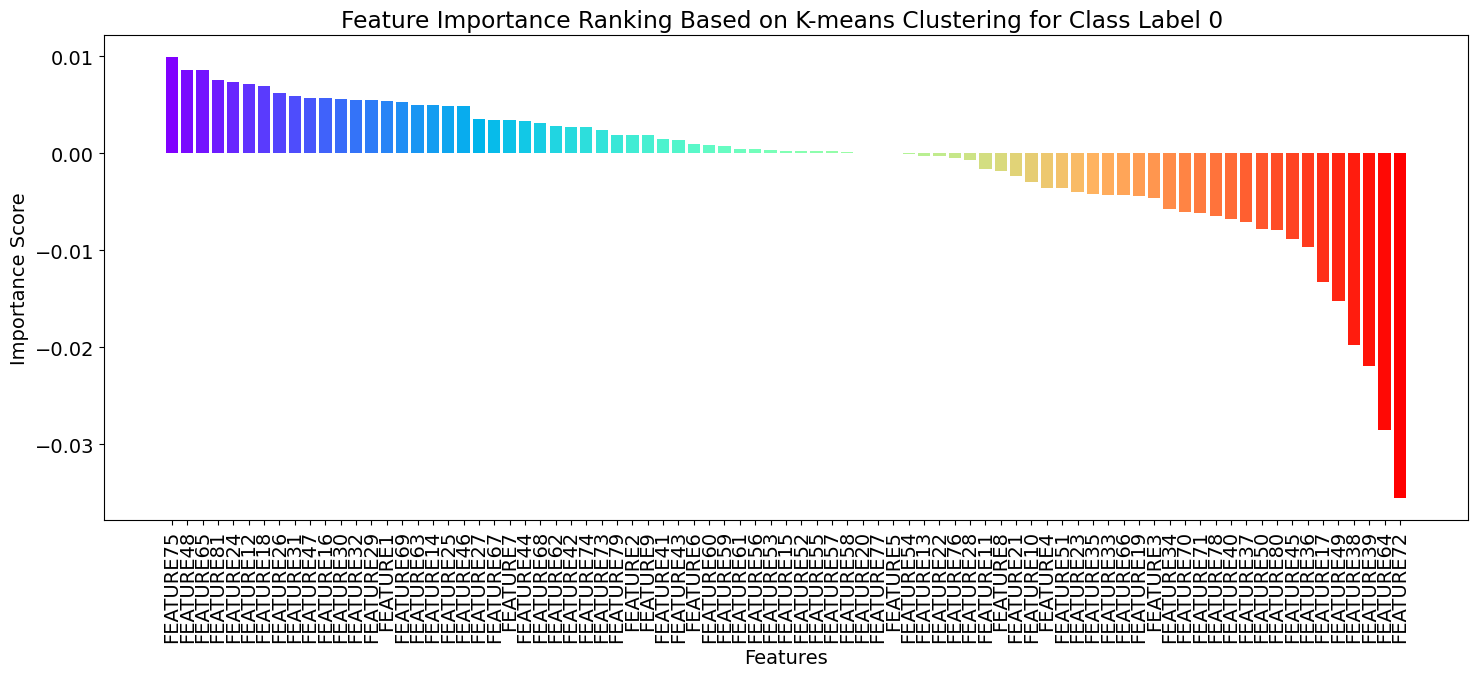

In [22]:
import matplotlib.pyplot as plt

# Assuming 'feature_importances' is a list of tuples with (feature_name, importance) from the previous steps
feature_names, importances = zip(*feature_importances_CB0)

plt.figure(figsize=(15, 7))
colors = plt.cm.rainbow(np.linspace(0, 1, len(feature_names)))  # Generate rainbow colors

plt.bar(feature_names, importances, color=colors)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance Ranking Based on K-means Clustering for Class Label 0 ')
plt.xticks(rotation=90)  # Rotate feature names to avoid overlap
plt.tight_layout()  # Adjust layout to fit all feature names
plt.savefig("/home/asma-rashidian/Documents/DrRahmani_projects/project4-DM-11-Bahman-1402/results/class_seprated/feature_ranks_classLable0.png")
plt.show()

#### For Class Label 1 :

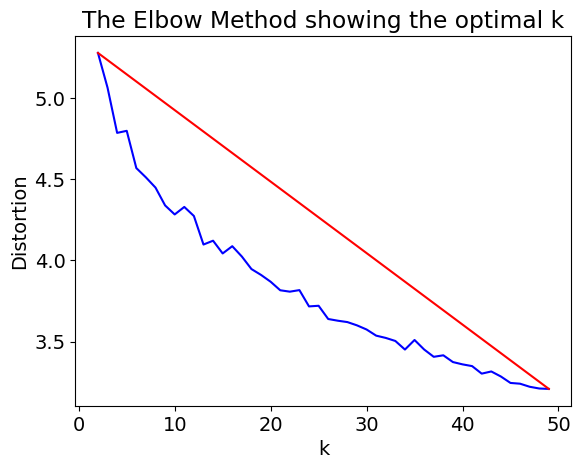

In [23]:
df_1_records_feature = df_1_records.iloc[:, :-1]

distortions = []
K = range(2, 50)
for k in K:
    k_means = KMeans(n_clusters=k).fit(df_1_records_feature)
    k_means.fit(df_1_records_feature)
    distortions.append(sum(np.min(cdist(df_1_records_feature, k_means.cluster_centers_, 'euclidean'), axis=1)) / df_1_records_feature.shape[0])

X_line = [K[0], K[-1]]
Y_line = [distortions[0], distortions[-1]]

# Plot the elbow
plt.plot(K, distortions, 'b-')
plt.plot(X_line, Y_line, 'r')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.savefig("/home/asma-rashidian/Documents/DrRahmani_projects/project4-DM-11-Bahman-1402/results/class_seprated/class_1_elbow.png")
plt.show()

In [24]:

n_clusters = 2
kmeans =  KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(df_1_records_feature)
pred_classLabel_1_rsampled = kmeans.labels_
baseline_score = silhouette_score(df_1_records_feature, pred_classLabel_1_rsampled)
print(baseline_score)

0.4963830190801325


In [25]:
# Initialize list to store feature importances
feature_importances_CB1 = []
# Iterate over all features and assess their importance
for i in range(df_1_records_feature.shape[1]):
    temp_X = np.delete(df_1_records_feature, i, axis=1)  # Omit the current feature
    kmeans.fit(temp_X)
    score = silhouette_score(temp_X, kmeans.labels_)
    importance = baseline_score - score  # A decrease in silhouette score
    feature_importances_CB1.append((df_1_records_feature.columns[i], importance))

# Sort features by importance
feature_importances_CB1.sort(key=lambda x: x[1], reverse=True)

# Print ranked features
print("Feature ranking based on K-means clustering for Class Label 1:")
for rank, (feature, importance) in enumerate(feature_importances_CB1, 1):
    display(f"{rank}. {feature}: {importance}")

Feature ranking based on K-means clustering for Class Label 1:


'1. FEATURE75: 0.009873950503348772'

'2. FEATURE48: 0.008589195747976841'

'3. FEATURE65: 0.008586901144274905'

'4. FEATURE81: 0.0074984552504374635'

'5. FEATURE24: 0.00731102786240545'

'6. FEATURE12: 0.007100893525616991'

'7. FEATURE18: 0.0068725483621470684'

'8. FEATURE26: 0.006157359068949986'

'9. FEATURE31: 0.005858814345333474'

'10. FEATURE47: 0.005712645862366805'

'11. FEATURE16: 0.005655116090235168'

'12. FEATURE30: 0.005591339101202075'

'13. FEATURE32: 0.005513403898285751'

'14. FEATURE29: 0.005496518772497072'

'15. FEATURE1: 0.005360330902349109'

'16. FEATURE69: 0.005308717700533927'

'17. FEATURE63: 0.005003145641184814'

'18. FEATURE14: 0.004945564186940421'

'19. FEATURE25: 0.004855027710161386'

'20. FEATURE46: 0.0048177835736957775'

'21. FEATURE27: 0.0035647677255227217'

'22. FEATURE67: 0.0034486207052610296'

'23. FEATURE7: 0.0034365946078366294'

'24. FEATURE44: 0.0032700366676261527'

'25. FEATURE68: 0.00315024823266824'

'26. FEATURE62: 0.0028127081209639027'

'27. FEATURE42: 0.002687641335709423'

'28. FEATURE74: 0.0026716194829973228'

'29. FEATURE73: 0.0024331578507192364'

'30. FEATURE79: 0.0019132951948915844'

'31. FEATURE2: 0.0018531627068822942'

'32. FEATURE9: 0.0018385619204268622'

'33. FEATURE41: 0.0014484582884344288'

'34. FEATURE43: 0.0013732261087801012'

'35. FEATURE6: 0.0008906783958190778'

'36. FEATURE60: 0.0007873624543742186'

'37. FEATURE59: 0.0007060444459348614'

'38. FEATURE61: 0.0004181625558621338'

'39. FEATURE56: 0.00039861380663153145'

'40. FEATURE53: 0.000306570356715663'

'41. FEATURE15: 0.00026956786758702833'

'42. FEATURE52: 0.00024929900146175576'

'43. FEATURE55: 0.00023342450995816888'

'44. FEATURE57: 0.00019158248243006382'

'45. FEATURE58: 7.797928332536896e-05'

'46. FEATURE20: 1.663383001043739e-05'

'47. FEATURE77: 1.2715968000787115e-08'

'48. FEATURE5: -1.9839397576271178e-05'

'49. FEATURE54: -4.4836625927024976e-05'

'50. FEATURE13: -0.00028034459995818217'

'51. FEATURE22: -0.00028675987665610636'

'52. FEATURE76: -0.00046567648908080184'

'53. FEATURE28: -0.0006810624548106436'

'54. FEATURE11: -0.0016464094548336305'

'55. FEATURE8: -0.0018655955264215707'

'56. FEATURE21: -0.00230888756589126'

'57. FEATURE10: -0.0029680937226542192'

'58. FEATURE4: -0.003614760679580109'

'59. FEATURE51: -0.0036209663324453523'

'60. FEATURE23: -0.003995865849706681'

'61. FEATURE35: -0.004216231667578785'

'62. FEATURE33: -0.00430641683857147'

'63. FEATURE66: -0.004362196595835366'

'64. FEATURE19: -0.004462602780900826'

'65. FEATURE3: -0.00457534232229706'

'66. FEATURE34: -0.00574096885930564'

'67. FEATURE70: -0.006114277532984769'

'68. FEATURE71: -0.006141509766191544'

'69. FEATURE78: -0.006514805614545427'

'70. FEATURE40: -0.006765549828694595'

'71. FEATURE37: -0.007082396337231622'

'72. FEATURE50: -0.007821250458159179'

'73. FEATURE80: -0.007949329037579611'

'74. FEATURE45: -0.008844444199655244'

'75. FEATURE36: -0.009661772251180034'

'76. FEATURE17: -0.013267840887308147'

'77. FEATURE49: -0.015272158149563508'

'78. FEATURE38: -0.019827391660981686'

'79. FEATURE39: -0.021978476976809214'

'80. FEATURE64: -0.02852577211548124'

'81. FEATURE72: -0.03557919879256721'

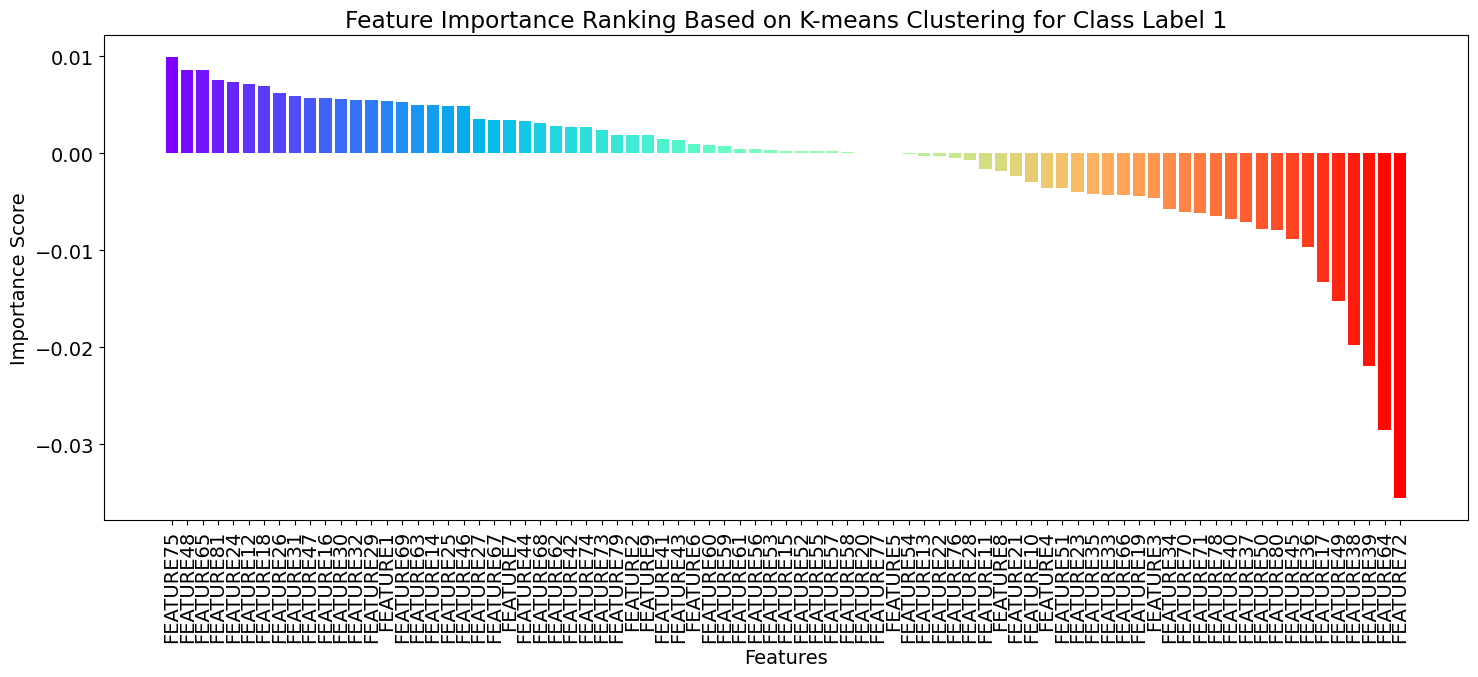

In [26]:
import matplotlib.pyplot as plt

# Assuming 'feature_importances' is a list of tuples with (feature_name, importance) from the previous steps
feature_names, importances = zip(*feature_importances_CB1)

plt.figure(figsize=(15, 7))
colors = plt.cm.rainbow(np.linspace(0, 1, len(feature_names)))  # Generate rainbow colors

plt.bar(feature_names, importances, color=colors)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance Ranking Based on K-means Clustering for Class Label 1')
plt.xticks(rotation=90)  # Rotate feature names to avoid overlap
plt.tight_layout()  # Adjust layout to fit all feature names
plt.savefig("/home/asma-rashidian/Documents/DrRahmani_projects/project4-DM-11-Bahman-1402/results/class_seprated/feature_ranks_classLable1.png")
plt.show()

### Part C: Chameleon and DBSCAN and Agglomerative Clustering

`Note!!`

The chameleon implemntation is in chameleon folderm but it was not able to run on my syatem .

#### DBSCAN

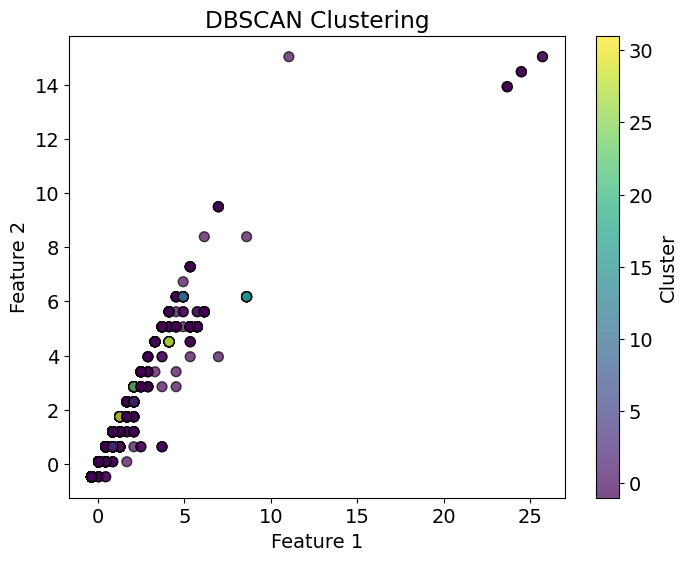

In [27]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(feature_df_rsampled)

# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(feature_df_rsampled.iloc[:, 2], feature_df_rsampled.iloc[:, 3], c=clusters, cmap='viridis', s=50, alpha=0.7, edgecolors='k')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.show()


In [28]:
baseLine_score_dbscan = silhouette_score(feature_df_rsampled, clusters)
baseLine_score_dbscan

-0.4974351051976154

In [29]:
feature_scores = []
for i in range(feature_df_rsampled.shape[1]):
    temp_X = np.delete(feature_df_rsampled, i, axis=1) 

    # Run DBSCAN
    dbscan = DBSCAN(eps=0.5, min_samples=5)  # eps and min_samples might need to be adjusted
    clusters = dbscan.fit_predict(temp_X)
    
    score = silhouette_score(temp_X, dbscan.labels_)
    importance = baseLine_score_dbscan - score  # A decrease in silhouette score
    feature_scores.append((feature_df_rsampled.columns[i], importance))



# Sort features by importance
feature_scores.sort(key=lambda x: x[1], reverse=True)

# Print ranked features
print("Feature ranking based on DBSCAN clustering:")
for rank, (feature, importance) in enumerate(feature_scores, 1):
    display(f"{rank}. {feature}: {importance}")

Feature ranking based on DBSCAN clustering:


'1. FEATURE11: 0.0032317556923039947'

'2. FEATURE21: 0.0028856485383865205'

'3. FEATURE78: 0.0025303864586639357'

'4. FEATURE64: 0.0023698868656759076'

'5. FEATURE72: 0.002244596395517162'

'6. FEATURE70: 0.002209445885039296'

'7. FEATURE14: 0.0020841856523959867'

'8. FEATURE20: 0.0020477166315797657'

'9. FEATURE66: 0.0016040353628780646'

'10. FEATURE38: 0.0015452441182017829'

'11. FEATURE76: 0.0014952391156624611'

'12. FEATURE2: 0.0012522602139997674'

'13. FEATURE39: 0.0010499369865124564'

'14. FEATURE17: 0.0009684631754198203'

'15. FEATURE69: 0.0009542651910314781'

'16. FEATURE80: 0.0008923824085637633'

'17. FEATURE40: 0.0008655725218174593'

'18. FEATURE49: 0.0008607610710742453'

'19. FEATURE77: 0.0008586819421457226'

'20. FEATURE75: 0.0008377018475324571'

'21. FEATURE19: 0.0008236634678074894'

'22. FEATURE8: 0.0007013853875567633'

'23. FEATURE13: 0.0006293034134708386'

'24. FEATURE7: 0.0006069910150831581'

'25. FEATURE9: 0.0004965794373748555'

'26. FEATURE73: 0.000492106079988619'

'27. FEATURE4: 0.0004879788297953991'

'28. FEATURE62: 0.0004297667624975632'

'29. FEATURE79: 0.00038539390793418393'

'30. FEATURE15: 0.00037663192683523583'

'31. FEATURE6: 0.00037495028797607244'

'32. FEATURE37: 0.00036368103683831476'

'33. FEATURE3: 0.0002216335853137963'

'34. FEATURE67: 0.00012996599291020816'

'35. FEATURE68: 0.0001084774033228153'

'36. FEATURE23: -2.976560183426402e-05'

'37. FEATURE12: -8.544998022719241e-05'

'38. FEATURE61: -0.00011658149263460427'

'39. FEATURE36: -0.0001352200093180933'

'40. FEATURE59: -0.0001832400597570616'

'41. FEATURE56: -0.0002717187444131186'

'42. FEATURE54: -0.0003052130164460931'

'43. FEATURE60: -0.0003064523262640839'

'44. FEATURE58: -0.00031557894536454745'

'45. FEATURE55: -0.0003205378381989643'

'46. FEATURE52: -0.00033604994969888'

'47. FEATURE53: -0.00037206922008187204'

'48. FEATURE33: -0.00040046936713739045'

'49. FEATURE16: -0.0004876200533448505'

'50. FEATURE57: -0.000495819676103959'

'51. FEATURE24: -0.000568612587258599'

'52. FEATURE45: -0.0006278831271388507'

'53. FEATURE65: -0.0006366967087821918'

'54. FEATURE74: -0.0006509628483640784'

'55. FEATURE18: -0.0006595575804052567'

'56. FEATURE35: -0.0006846414687869395'

'57. FEATURE48: -0.0007642085385115571'

'58. FEATURE44: -0.0007971146955824127'

'59. FEATURE5: -0.0009346832674008709'

'60. FEATURE28: -0.0017080900173991331'

'61. FEATURE81: -0.0017731245408272867'

'62. FEATURE10: -0.0018768607125908554'

'63. FEATURE34: -0.0019164406049629878'

'64. FEATURE50: -0.0019893632950278572'

'65. FEATURE31: -0.0020655606654000347'

'66. FEATURE26: -0.00208239150583045'

'67. FEATURE43: -0.0022941625503181684'

'68. FEATURE29: -0.002306405659640187'

'69. FEATURE25: -0.002321932683381711'

'70. FEATURE27: -0.0023506889345618065'

'71. FEATURE32: -0.002568174682190505'

'72. FEATURE1: -0.0030289326536422356'

'73. FEATURE42: -0.0031979702829800227'

'74. FEATURE41: -0.003204282283097881'

'75. FEATURE47: -0.003231790853270189'

'76. FEATURE63: -0.0032496426189045358'

'77. FEATURE30: -0.0034223725518593984'

'78. FEATURE46: -0.0035680675519627614'

'79. FEATURE51: -0.004083284308880664'

'80. FEATURE22: -0.007553202905345557'

'81. FEATURE71: -0.029813336385294986'

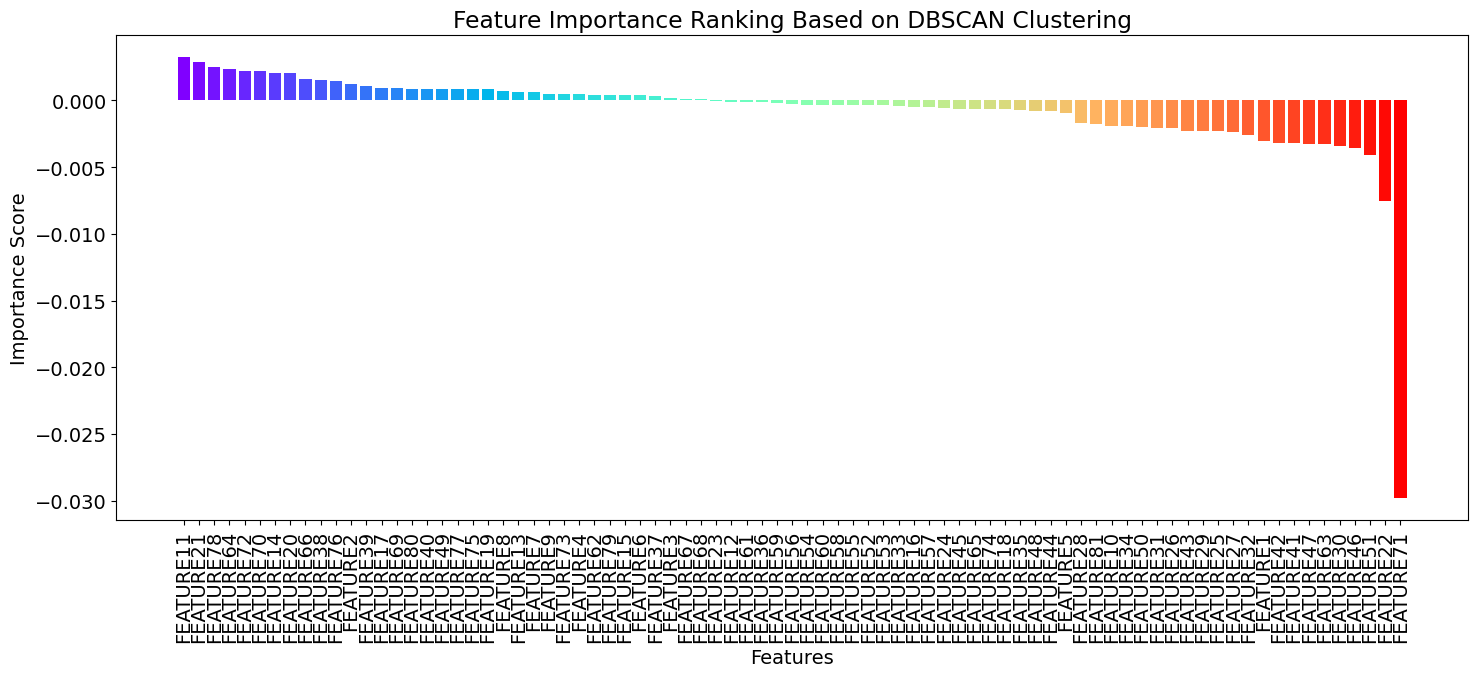

In [31]:
feature_names, importances = zip(*feature_scores)

plt.figure(figsize=(15, 7))
colors = plt.cm.rainbow(np.linspace(0, 1, len(feature_names)))  # Generate rainbow colors

plt.bar(feature_names, importances, color=colors)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance Ranking Based on DBSCAN Clustering')
plt.xticks(rotation=90)  # Rotate feature names to avoid overlap
plt.tight_layout()  # Adjust layout to fit all feature names
plt.savefig("/home/asma-rashidian/Documents/DrRahmani_projects/project4-DM-11-Bahman-1402/results/Dbscan/feature_ranks.png")
plt.show()

#### Agglomerative Clustering

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


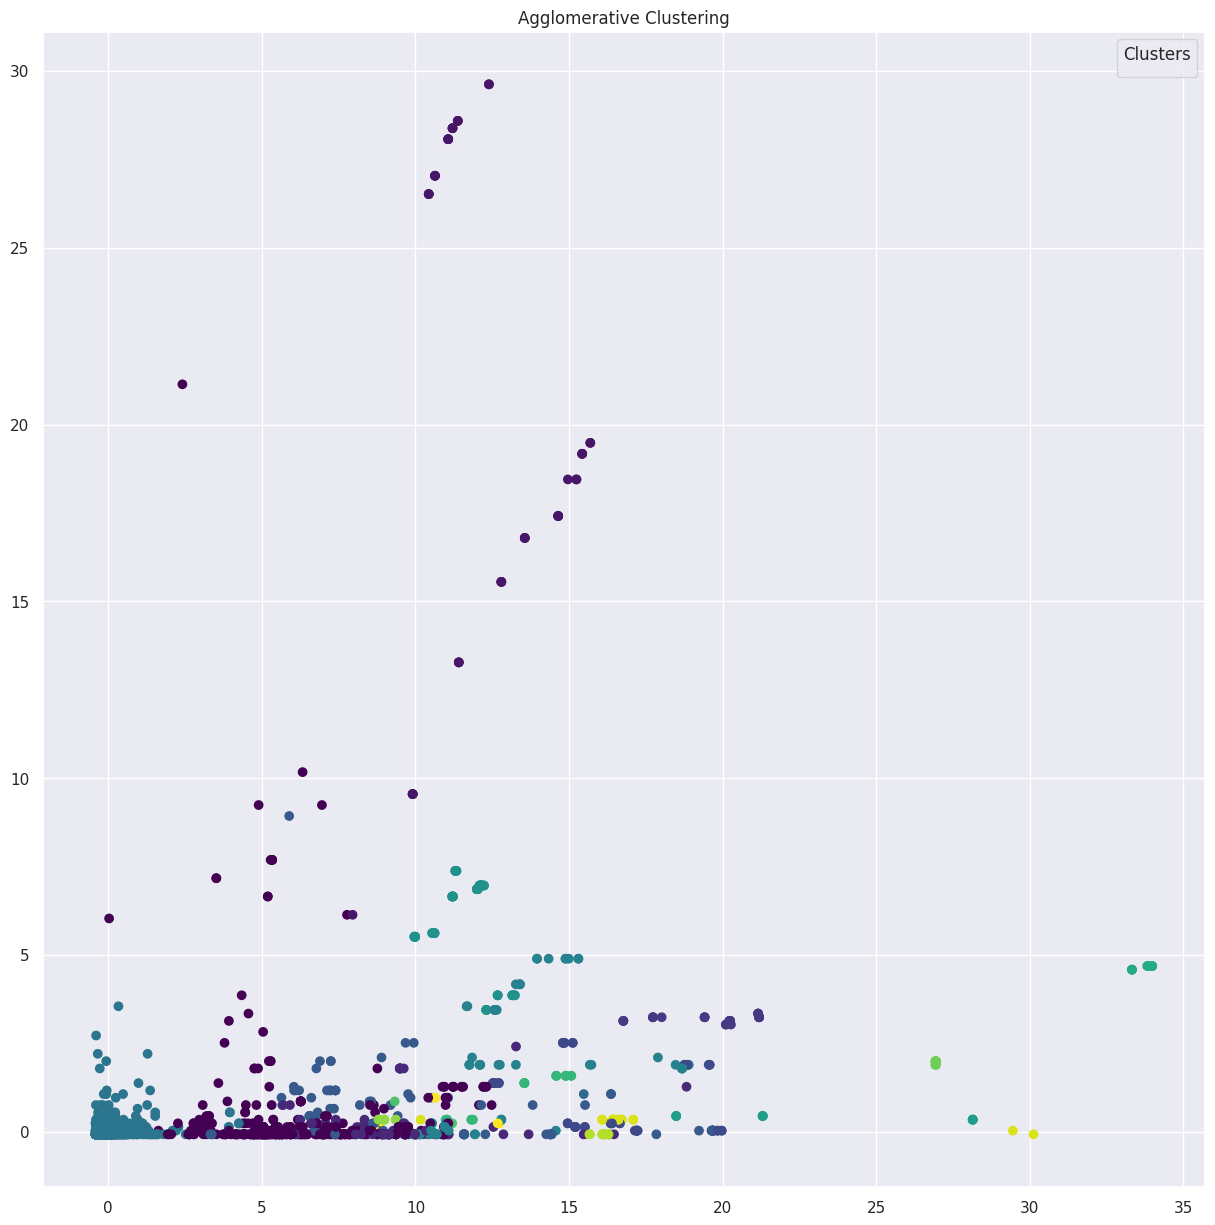

In [34]:

from sklearn.cluster import AgglomerativeClustering

agglomerative  = AgglomerativeClustering(n_clusters=19)
clusters_agglomerative = agglomerative.fit(feature_df_rsampled)

# sns settings
sns.set(rc={'figure.figsize':(15, 15)})

# colors
palette = sns.hls_palette(20, l=.4, s=.9)

# plot
plt.scatter(feature_df_rsampled.iloc[:, 0], feature_df_rsampled.iloc[:, 1], c=clusters_agglomerative.labels_, cmap='viridis')
plt.title("Agglomerative Clustering")
plt.legend(title='Clusters', loc='upper right')
plt.savefig("/home/asma-rashidian/Documents/DrRahmani_projects/project3-DM-24-Dey-1402/results/tfidf_pca_agglomerative_labeled_covid19.png")
plt.show()



In [35]:
baseLine_score_agglomerative = silhouette_score(feature_df_rsampled, clusters_agglomerative.labels_)
baseLine_score_agglomerative

0.5120187626055719

In [36]:


feature_scores = []
for i in range(feature_df_rsampled.shape[1]):
    temp_X = np.delete(feature_df_rsampled, i, axis=1) 

    # Run agglomerative
    agglomerative = AgglomerativeClustering(n_clusters=5)  # eps and min_samples might need to be adjusted
    clusters = dbscan.fit(temp_X)
    
    score = silhouette_score(temp_X, clusters_agglomerative.labels_)
    importance = baseLine_score_agglomerative - score  # A decrease in silhouette score
    feature_scores.append((feature_df_rsampled.columns[i], importance))



# Sort features by importance
feature_scores.sort(key=lambda x: x[1], reverse=True)

# Print ranked features
print("Feature ranking based on Agglomerative clustering:")
for rank, (feature, importance) in enumerate(feature_scores, 1):
    display(f"{rank}. {feature}: {importance}")

Feature ranking based on Agglomerative clustering:


'1. FEATURE28: 0.008452216481221964'

'2. FEATURE20: 0.007573805294986413'

'3. FEATURE47: 0.003728569149766381'

'4. FEATURE1: 0.0033997408459061074'

'5. FEATURE49: 0.003371017906070417'

'6. FEATURE77: 0.003343483494072874'

'7. FEATURE25: 0.003025525503634219'

'8. FEATURE26: 0.003009697709599246'

'9. FEATURE31: 0.0028626698714392385'

'10. FEATURE24: 0.0027536426585546003'

'11. FEATURE30: 0.0025143089171600908'

'12. FEATURE23: 0.002468161162968885'

'13. FEATURE29: 0.002311647835908426'

'14. FEATURE16: 0.0021410421832741555'

'15. FEATURE27: 0.0021344854382281397'

'16. FEATURE32: 0.0019765995971599004'

'17. FEATURE18: 0.001798199423484581'

'18. FEATURE35: 0.0013098302243985671'

'19. FEATURE63: 0.0012508093007105314'

'20. FEATURE36: 0.0009841547170702514'

'21. FEATURE2: 0.0009453380093665809'

'22. FEATURE42: 0.0008299990374640576'

'23. FEATURE43: 0.0006413958472453185'

'24. FEATURE48: 0.0006373042203967616'

'25. FEATURE41: 0.0006258146273782073'

'26. FEATURE65: 0.000531538716420199'

'27. FEATURE17: 0.0003324353178467687'

'28. FEATURE33: 0.000305289885930371'

'29. FEATURE75: 0.00029613234333891736'

'30. FEATURE46: 0.00028858416513133367'

'31. FEATURE21: 0.00019976132970067617'

'32. FEATURE15: 0.00015223690095378384'

'33. FEATURE55: 6.615511949137343e-05'

'34. FEATURE34: 4.450731058236457e-05'

'35. FEATURE54: 6.337511914145111e-06'

'36. FEATURE69: -2.9196227204764114e-05'

'37. FEATURE56: -6.538042911508057e-05'

'38. FEATURE58: -8.5734122693637e-05'

'39. FEATURE52: -9.571668842789371e-05'

'40. FEATURE44: -0.00010797808637219575'

'41. FEATURE53: -0.00013728822162673016'

'42. FEATURE61: -0.00016584243787010067'

'43. FEATURE68: -0.00017311740619030402'

'44. FEATURE12: -0.00018238184660934742'

'45. FEATURE67: -0.0002076590151925961'

'46. FEATURE60: -0.0002849173922664372'

'47. FEATURE59: -0.00030467129530697967'

'48. FEATURE57: -0.00030926388457575005'

'49. FEATURE70: -0.0003402773394973746'

'50. FEATURE81: -0.00044168796054067094'

'51. FEATURE74: -0.0005523672880783925'

'52. FEATURE5: -0.0006133386844346944'

'53. FEATURE3: -0.0006168789033001998'

'54. FEATURE22: -0.0006499121590662904'

'55. FEATURE72: -0.000774025727367178'

'56. FEATURE64: -0.0008525468309046325'

'57. FEATURE79: -0.0009650764931000699'

'58. FEATURE9: -0.0009968781857173648'

'59. FEATURE4: -0.0010040663647994386'

'60. FEATURE7: -0.0010222590998827386'

'61. FEATURE13: -0.0011262906693366714'

'62. FEATURE10: -0.0011323737614959972'

'63. FEATURE6: -0.0011456106649428976'

'64. FEATURE14: -0.0012094147113962395'

'65. FEATURE19: -0.0012543047080013636'

'66. FEATURE62: -0.0012543231009962685'

'67. FEATURE80: -0.0013318360238219196'

'68. FEATURE8: -0.0013656896438681843'

'69. FEATURE38: -0.0013668982467023305'

'70. FEATURE66: -0.0014960553087696171'

'71. FEATURE76: -0.0015611777783540726'

'72. FEATURE40: -0.0016525517903924758'

'73. FEATURE39: -0.0018084208679018943'

'74. FEATURE11: -0.0019051707107667903'

'75. FEATURE37: -0.001977865755278918'

'76. FEATURE51: -0.0020912988663646104'

'77. FEATURE50: -0.002198550160137702'

'78. FEATURE45: -0.0023349631012934413'

'79. FEATURE73: -0.0024712012374722425'

'80. FEATURE78: -0.002616587382613833'

'81. FEATURE71: -0.002762054650845336'

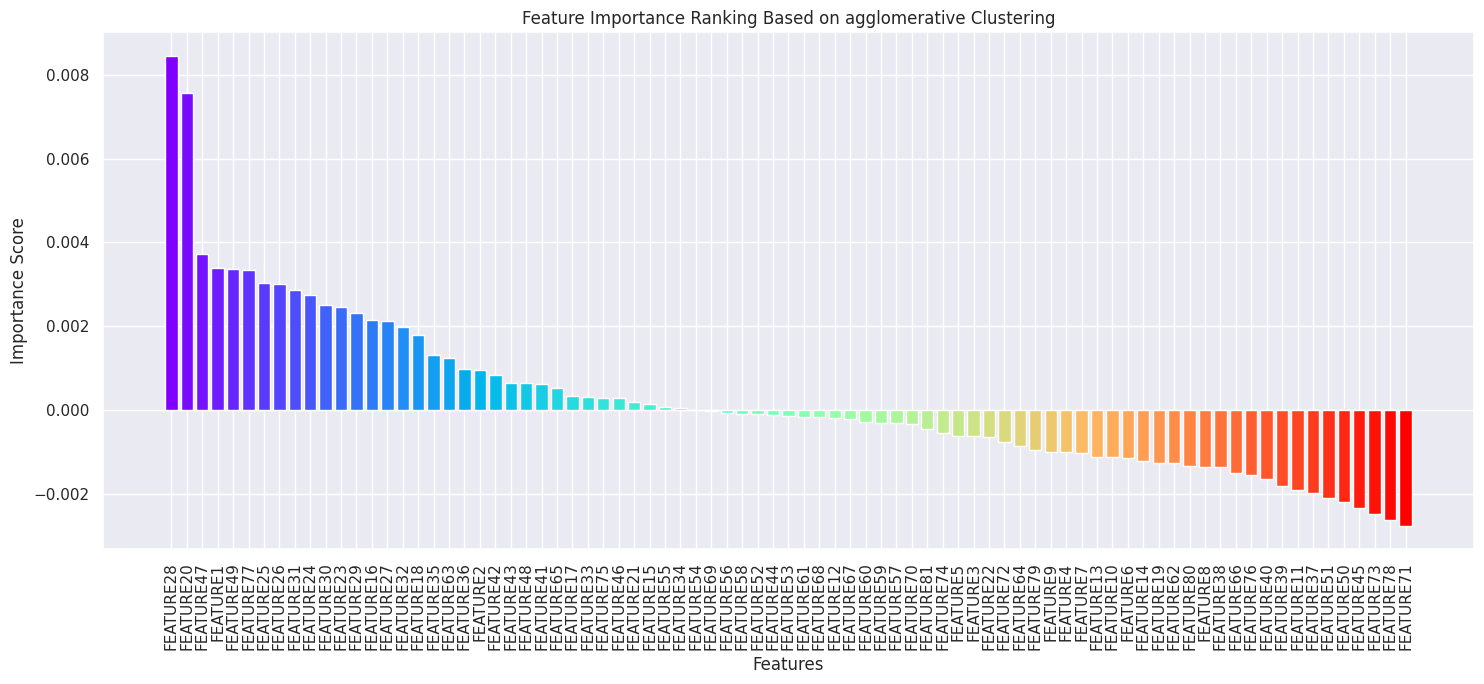

In [37]:
feature_names, importances = zip(*feature_scores)

plt.figure(figsize=(15, 7))
colors = plt.cm.rainbow(np.linspace(0, 1, len(feature_names)))  # Generate rainbow colors

plt.bar(feature_names, importances, color=colors)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance Ranking Based on agglomerative Clustering')
plt.xticks(rotation=90)  # Rotate feature names to avoid overlap
plt.tight_layout()  # Adjust layout to fit all feature names
plt.savefig("/home/asma-rashidian/Documents/DrRahmani_projects/project4-DM-11-Bahman-1402/results/agglomerative/feature_ranks.png")
plt.show()

## Supervised

#### Randon Forest

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score, recall_score

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(feature_df_rsampled, classLabel_df_rsampled, test_size=0.3 , random_state=42)

# Training the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

rf_metrics = pd.DataFrame({
    'Model': ['Random Forest'],
    'Accuracy': [accuracy],
    'F1 Score': [f1],
    'AUC-ROC': [roc_auc],
    'Recall': [recall]
})

display(rf_metrics)

conf_matrix = confusion_matrix(y_test, y_pred)

# Printing the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Save metrics to a CSV file
rf_metrics.to_csv('/home/asma-rashidian/Documents/DrRahmani_projects/project4-DM-11-Bahman-1402/results/randomForest/rando_forest_metrics.csv', index=False)

,Model,Accuracy,F1 Score,AUC-ROC,Recall
0,Random Forest,0.996633,0.996564,0.996711,1.0


Confusion Matrix:
[[302   2]
 [  0 290]]


In [39]:
#  Get feature importances
importances = rf.feature_importances_

# Rank features
# Create a DataFrame for visualization
feature_importances = pd.DataFrame({'feature': feature_df_rsampled.columns, 'importance': importances})
feature_importances = feature_importances.sort_values('importance', ascending=False).reset_index(drop=True)



# Display the feature importances
display(feature_importances)


,feature,importance
0,FEATURE27,0.124667
1,FEATURE47,0.113485
2,FEATURE1,0.108488
3,FEATURE29,0.082190
4,FEATURE30,0.070865
...,...,...
76,FEATURE56,0.000000
77,FEATURE58,0.000000
78,FEATURE59,0.000000
79,FEATURE52,0.000000


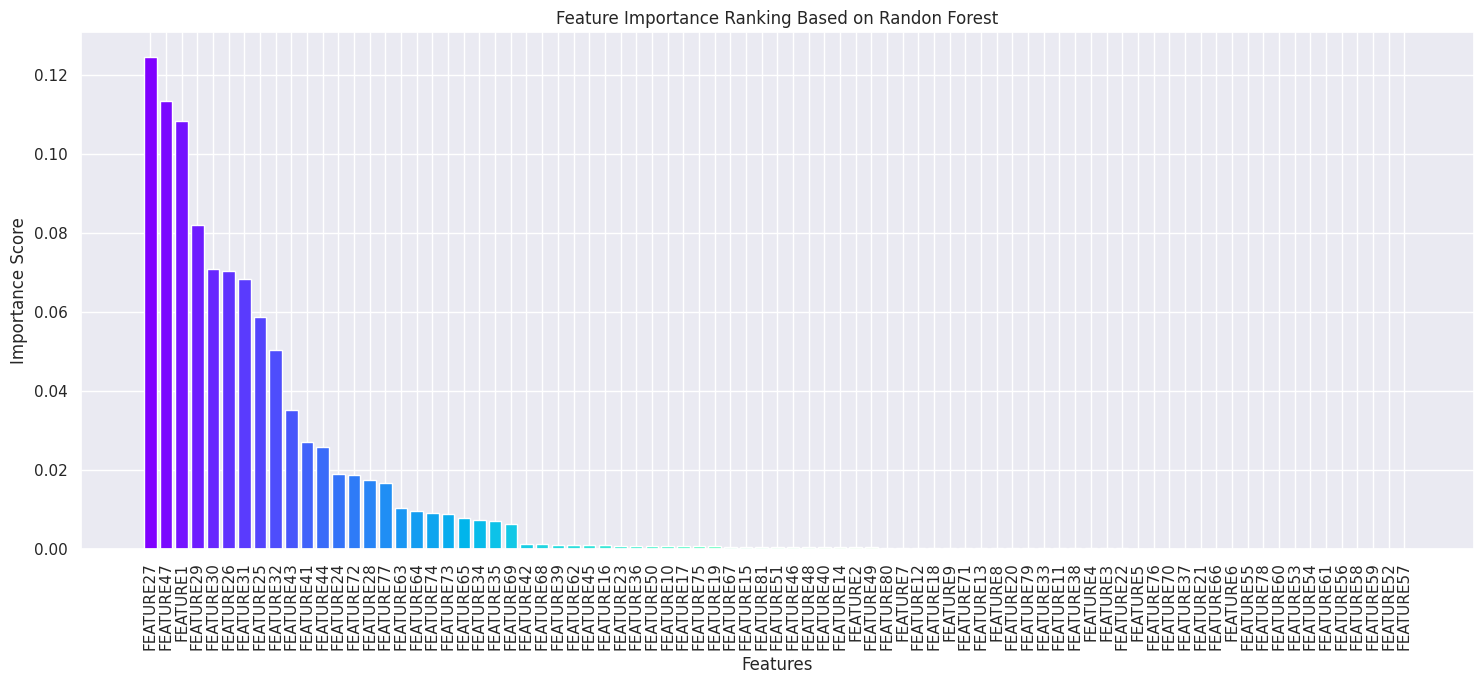

In [42]:
feature_random_forest_importance = feature_importances.values.tolist()
feature_names, importances = zip(*feature_random_forest_importance)

plt.figure(figsize=(15, 7))
colors = plt.cm.rainbow(np.linspace(0, 1, len(feature_names)))  # Generate rainbow colors

plt.bar(feature_names, importances, color=colors)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance Ranking Based on Randon Forest')
plt.xticks(rotation=90)  # Rotate feature names to avoid overlap
plt.tight_layout()  # Adjust layout to fit all feature names
plt.savefig("/home/asma-rashidian/Documents/DrRahmani_projects/project4-DM-11-Bahman-1402/results/randomForest/feature_rank.png")
plt.show()

#### Gradient Boosting

In [45]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(feature_df_rsampled, classLabel_df_rsampled, test_size=0.3 , random_state=42)

# Training the model
gbm = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbm.fit(X_train, y_train)

y_pred = gbm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

gbm_metrics = pd.DataFrame({
    'Model': ['GradientBoostingClassifier'],
    'Accuracy': [accuracy],
    'F1 Score': [f1],
    'AUC-ROC': [roc_auc],
    'Recall': [recall]
})

display(gbm_metrics)
conf_matrix = confusion_matrix(y_test, y_pred)

# Printing the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Save metrics to a CSV file
rf_metrics.to_csv('/home/asma-rashidian/Documents/DrRahmani_projects/project4-DM-11-Bahman-1402/results/gradientboosting/gbm_metrics.csv', index=False)

,Model,Accuracy,F1 Score,AUC-ROC,Recall
0,GradientBoostingClassifier,0.994949,0.994836,0.994986,0.996552


Confusion Matrix:
[[302   2]
 [  1 289]]


In [49]:
#  Get feature importances
importances = gbm.feature_importances_

# Rank features
# Create a DataFrame for visualization
feature_importances = pd.DataFrame({'feature': feature_df_rsampled.columns, 'importance': importances})
feature_importances = feature_importances.sort_values('importance', ascending=False).reset_index(drop=True)



# Display the feature importances
display(feature_importances)

,feature,importance
0,FEATURE1,0.964872
1,FEATURE47,0.006271
2,FEATURE17,0.005266
3,FEATURE23,0.003412
4,FEATURE28,0.001579
...,...,...
76,FEATURE57,0.000000
77,FEATURE56,0.000000
78,FEATURE55,0.000000
79,FEATURE54,0.000000


/tmp/ipykernel_5409/4053954471.py:12: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()  # Adjust layout to fit all feature names
/tmp/ipykernel_5409/4053954471.py:13: UserWarning: Glyph 9 (	) missing from current font.
  plt.savefig("/home/asma-rashidian/Documents/DrRahmani_projects/project4-DM-11-Bahman-1402/results/gradientboosting/feature_rank.png")


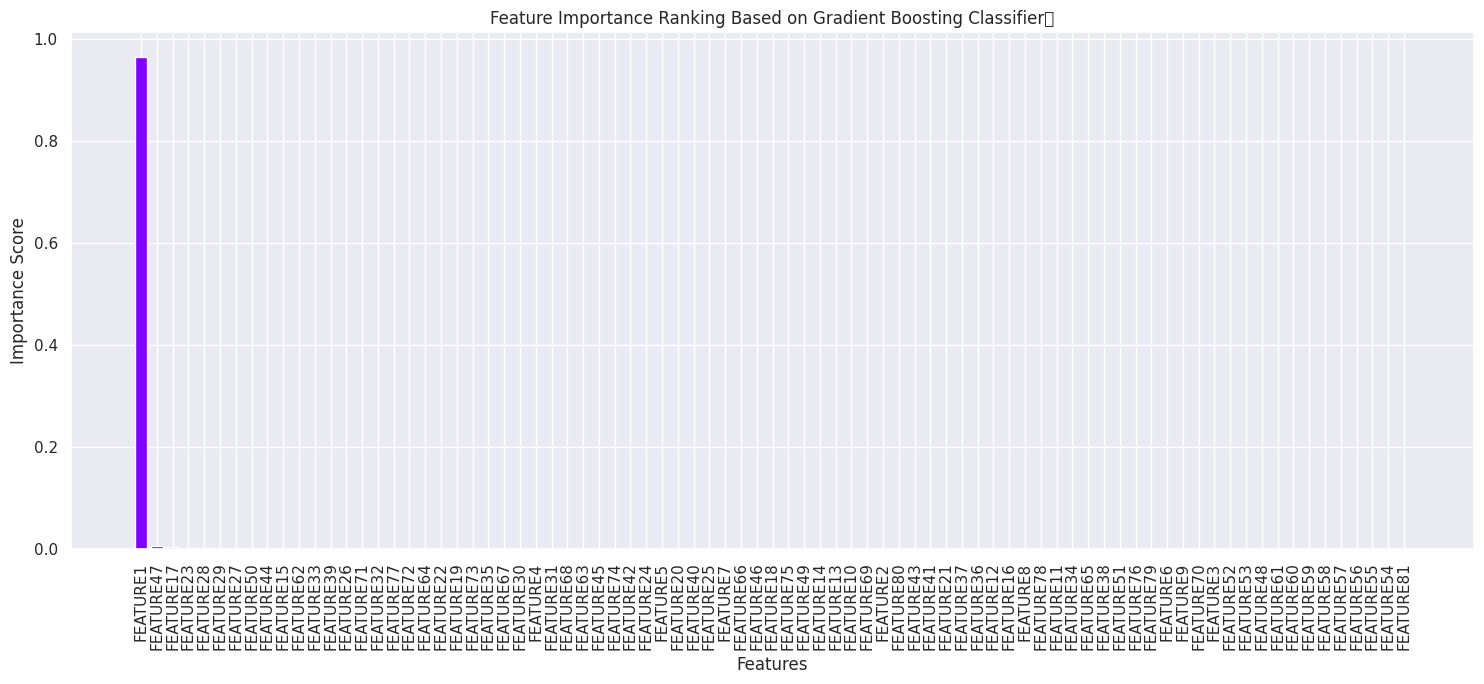

In [52]:
feature_gradient_importance = feature_importances.values.tolist()
feature_names, importances = zip(*feature_gradient_importance)

plt.figure(figsize=(15, 7))
colors = plt.cm.rainbow(np.linspace(0, 1, len(feature_names)))  # Generate rainbow colors

plt.bar(feature_names, importances, color=colors)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance Ranking Based on Gradient Boosting Classifier	')
plt.xticks(rotation=90)  # Rotate feature names to avoid overlap
plt.tight_layout()  # Adjust layout to fit all feature names
plt.savefig("/home/asma-rashidian/Documents/DrRahmani_projects/project4-DM-11-Bahman-1402/results/gradientboosting/feature_rank.png")
plt.show()

# Results 

### Part A :

High Ranked Features of each algorithm :

Agglomerative clustering = [28,20,47,1,49,77,25,26,31,44,30,23,29,16,26,32,18]

Class label 0 kmean and Class label 1 kmean = [75,48,65,81,24,12,18,26,31,47,16,30,32,29,1,69]

DBSCAN = [11,21,78,34,72,70,14,20,66,38,76,2,39,17,62]

Gradient Boosting = [1,47]

K-Means = [46,43,41,27,32,42,35,30,36,29,25,34]

Random Forest = [27,47,1,29,30,26,31,25,32,43,21,44,24,72,28]

As you can see features by number `1, 24, 25, 26, 29, 30, 31, 32, 47` are repeated in most of results.

### Part B,C


**Clustering Models:**
The silhouette score is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). A high silhouette score indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. The scores you provided are for:

1. **K-Means:** The silhouette score is relatively higher, which suggests that the K-Means algorithm was able to find clusters where, on average, each data point is closer to the points in its cluster than to points in other clusters.

2. **Class label 0 kmean and Class label 1 kmean:** These scores are identical and lower than the overall K-Means score, which could indicate that when the data is split by a certain class label before applying K-Means, the resulting clusters are not as distinct.

3. **DBSCAN:** This method has a slightly higher score than the class-specific K-Means, suggesting that the density-based clustering is finding slightly better-defined clusters than K-Means when the data is split by class.

4. **Agglomerative Clustering:** This method has a silhouette score between that of DBSCAN and K-Means, indicating its performance in defining clusters is in the middle of the pack.

The differences in silhouette scores can be attributed to the distinctive ways each algorithm approaches clustering:

- **K-Means** works well when clusters are spherical and evenly sized.
- **DBSCAN** is good at finding arbitrarily shaped clusters and can filter out noise, but its performance heavily depends on the choice of parameters.
- **Agglomerative Clustering** creates clusters based on the hierarchy and can vary greatly with the choice of linkage criteria.

**Classification Models:**
For classification models like Random Forest and Gradient Boosting, metrics like Accuracy, F1 Score, AUC-ROC, and Recall are used:

1. **Random Forest:** Shows very high scores across all metrics, including a perfect Recall score, which suggests that the model has excellent predictive capabilities and is able to correctly identify all true positives.

2. **Gradient Boosting:** Also has high scores, but slightly lower than Random Forest. The one false negative can be seen in the confusion matrix, which slightly lowers the F1 Score and AUC-ROC.

The differences in performance between Random Forest, Gradient Boosting and clustering methods could be due to several factors:

- **Overfitting:** Random Forest might be better at generalizing to unseen data compared to Gradient Boosting.
- **Model Complexity:** Gradient Boosting incrementally builds trees to correct errors and might be more prone to noise.
- **Data Distribution:** Some models work better depending on the underlying distribution of the data.

In summary, the differences in the evaluation metrics for clustering methods might be due to the inherent differences in how the algorithms partition the data into clusters. For classification methods, the differences might stem from how each model handles the bias-variance tradeoff and the data's features and labels distribution.

